In [151]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo


In [152]:
# Step 1: Load the data
data_path = r'../../data/tidy/NTD_Annual_Data_Tidy_v02.csv'
df = pd.read_csv(data_path)

In [153]:
df

,NTD ID,Operating Federal,Operating State,Operating Local,Operating Other,Capital Federal,Capital State,Capital Local,Capital Other,Agency,...,OpExp VO,OpExp VM,OpExp NVM,OpExp GA,FARES,DRM,VRM,VRH,UPT,PMT
0,1,126313019.0,17798927.0,573912810.0,266339342.0,35398236.0,22300662.0,97008549.0,9939102.0,"King County Department of Metro Transit, dba: ...",...,451370915.0,141511449.0,53402066.0,200428008.0,110193783.0,1723.79,44527766.0,3902037.0,66445408.0,255184734.0
1,2,31270192.0,1708713.0,51822996.0,9554657.0,12159213.0,674190.0,27455824.0,0.0,Spokane Transit Authority,...,55898294.0,13548065.0,5417445.0,19118056.0,6914112.0,958.10,9410066.0,620938.0,6995911.0,33388468.0
2,3,40262064.0,2058990.0,37023952.0,63377478.0,3949421.0,5183835.0,36622271.0,0.0,Pierce County Transportation Benefit Area Auth...,...,51294568.0,12582509.0,2911552.0,26282912.0,10830732.0,516.68,8973273.0,585032.0,5548156.0,33831615.0
3,4,1490917.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Confederated Tribes of the Colville Indian Res...,...,0.0,0.0,0.0,0.0,0.0,0.00,76622.0,7290.0,135939.0,0.0
4,5,12787325.0,993691.0,6623445.0,3385223.0,179716.0,224413.0,540939.0,0.0,"City of Everett, dba: EVERETT TRANSIT",...,13065194.0,3060828.0,1253222.0,6378405.0,810229.0,118.40,1446138.0,120693.0,1072281.0,4141886.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,99452,28844.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Elk Valley Rancheria,...,0.0,0.0,0.0,0.0,0.0,0.00,936.0,23.0,60.0,0.0
2723,99453,123243.0,0.0,0.0,5132.0,0.0,0.0,0.0,0.0,City of Winslow,...,0.0,0.0,0.0,0.0,5132.0,0.00,6234.0,354.0,1731.0,0.0
2724,99454,406203.0,642646.0,20000.0,91788.0,0.0,0.0,0.0,0.0,Palo Verde Valley Transit Agency,...,0.0,0.0,0.0,0.0,44475.0,0.00,135540.0,5536.0,21404.0,0.0
2725,99455,52511.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
# Step 2: Data Cleaning
# Drop columns with more than 50% missing values
df = df.loc[:, df.isnull().mean() < 0.5]
df

,NTD ID,Operating Federal,Operating State,Operating Local,Operating Other,Capital Federal,Capital State,Capital Local,Capital Other,Agency,...,OpExp VO,OpExp VM,OpExp NVM,OpExp GA,FARES,DRM,VRM,VRH,UPT,PMT
0,1,126313019.0,17798927.0,573912810.0,266339342.0,35398236.0,22300662.0,97008549.0,9939102.0,"King County Department of Metro Transit, dba: ...",...,451370915.0,141511449.0,53402066.0,200428008.0,110193783.0,1723.79,44527766.0,3902037.0,66445408.0,255184734.0
1,2,31270192.0,1708713.0,51822996.0,9554657.0,12159213.0,674190.0,27455824.0,0.0,Spokane Transit Authority,...,55898294.0,13548065.0,5417445.0,19118056.0,6914112.0,958.10,9410066.0,620938.0,6995911.0,33388468.0
2,3,40262064.0,2058990.0,37023952.0,63377478.0,3949421.0,5183835.0,36622271.0,0.0,Pierce County Transportation Benefit Area Auth...,...,51294568.0,12582509.0,2911552.0,26282912.0,10830732.0,516.68,8973273.0,585032.0,5548156.0,33831615.0
3,4,1490917.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Confederated Tribes of the Colville Indian Res...,...,0.0,0.0,0.0,0.0,0.0,0.00,76622.0,7290.0,135939.0,0.0
4,5,12787325.0,993691.0,6623445.0,3385223.0,179716.0,224413.0,540939.0,0.0,"City of Everett, dba: EVERETT TRANSIT",...,13065194.0,3060828.0,1253222.0,6378405.0,810229.0,118.40,1446138.0,120693.0,1072281.0,4141886.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,99452,28844.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Elk Valley Rancheria,...,0.0,0.0,0.0,0.0,0.0,0.00,936.0,23.0,60.0,0.0
2723,99453,123243.0,0.0,0.0,5132.0,0.0,0.0,0.0,0.0,City of Winslow,...,0.0,0.0,0.0,0.0,5132.0,0.00,6234.0,354.0,1731.0,0.0
2724,99454,406203.0,642646.0,20000.0,91788.0,0.0,0.0,0.0,0.0,Palo Verde Valley Transit Agency,...,0.0,0.0,0.0,0.0,44475.0,0.00,135540.0,5536.0,21404.0,0.0
2725,99455,52511.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
# Step 2: Data Cleaning
# Drop rows with any NaN values in any column
df = df.dropna(how='any')
df

,NTD ID,Operating Federal,Operating State,Operating Local,Operating Other,Capital Federal,Capital State,Capital Local,Capital Other,Agency,...,OpExp VO,OpExp VM,OpExp NVM,OpExp GA,FARES,DRM,VRM,VRH,UPT,PMT
0,1,126313019.0,17798927.0,573912810.0,266339342.0,35398236.0,22300662.0,97008549.0,9939102.0,"King County Department of Metro Transit, dba: ...",...,451370915.0,141511449.0,53402066.0,200428008.0,110193783.0,1723.79,44527766.0,3902037.0,66445408.0,255184734.0
1,2,31270192.0,1708713.0,51822996.0,9554657.0,12159213.0,674190.0,27455824.0,0.0,Spokane Transit Authority,...,55898294.0,13548065.0,5417445.0,19118056.0,6914112.0,958.10,9410066.0,620938.0,6995911.0,33388468.0
2,3,40262064.0,2058990.0,37023952.0,63377478.0,3949421.0,5183835.0,36622271.0,0.0,Pierce County Transportation Benefit Area Auth...,...,51294568.0,12582509.0,2911552.0,26282912.0,10830732.0,516.68,8973273.0,585032.0,5548156.0,33831615.0
3,4,1490917.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Confederated Tribes of the Colville Indian Res...,...,0.0,0.0,0.0,0.0,0.0,0.00,76622.0,7290.0,135939.0,0.0
4,5,12787325.0,993691.0,6623445.0,3385223.0,179716.0,224413.0,540939.0,0.0,"City of Everett, dba: EVERETT TRANSIT",...,13065194.0,3060828.0,1253222.0,6378405.0,810229.0,118.40,1446138.0,120693.0,1072281.0,4141886.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,99441,174873.0,0.0,30519.0,3581.0,0.0,0.0,0.0,0.0,Payson Senior Center,...,0.0,0.0,0.0,0.0,3581.0,0.00,70736.0,5072.0,4310.0,0.0
2721,99442,275920.0,339983.0,445640.0,81711.0,0.0,72083.0,0.0,0.0,Calaveras Transit Agency,...,0.0,0.0,0.0,0.0,39175.0,0.00,306606.0,12313.0,20460.0,0.0
2722,99452,28844.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Elk Valley Rancheria,...,0.0,0.0,0.0,0.0,0.0,0.00,936.0,23.0,60.0,0.0
2723,99453,123243.0,0.0,0.0,5132.0,0.0,0.0,0.0,0.0,City of Winslow,...,0.0,0.0,0.0,0.0,5132.0,0.00,6234.0,354.0,1731.0,0.0


In [156]:
# Separate numerical and non-numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
non_numerical_cols = df.select_dtypes(exclude=[np.number]).columns

In [157]:
# Fill missing values in numerical columns with the mean
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_26600\2418088848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())


In [158]:
# Drop non-numerical columns for this analysis
df_numerical = df[numerical_cols]

In [159]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

In [160]:
df

,NTD ID,Operating Federal,Operating State,Operating Local,Operating Other,Capital Federal,Capital State,Capital Local,Capital Other,Agency,...,OpExp VO,OpExp VM,OpExp NVM,OpExp GA,FARES,DRM,VRM,VRH,UPT,PMT
0,1,126313019.0,17798927.0,573912810.0,266339342.0,35398236.0,22300662.0,97008549.0,9939102.0,"King County Department of Metro Transit, dba: ...",...,451370915.0,141511449.0,53402066.0,200428008.0,110193783.0,1723.79,44527766.0,3902037.0,66445408.0,255184734.0
1,2,31270192.0,1708713.0,51822996.0,9554657.0,12159213.0,674190.0,27455824.0,0.0,Spokane Transit Authority,...,55898294.0,13548065.0,5417445.0,19118056.0,6914112.0,958.10,9410066.0,620938.0,6995911.0,33388468.0
2,3,40262064.0,2058990.0,37023952.0,63377478.0,3949421.0,5183835.0,36622271.0,0.0,Pierce County Transportation Benefit Area Auth...,...,51294568.0,12582509.0,2911552.0,26282912.0,10830732.0,516.68,8973273.0,585032.0,5548156.0,33831615.0
3,4,1490917.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Confederated Tribes of the Colville Indian Res...,...,0.0,0.0,0.0,0.0,0.0,0.00,76622.0,7290.0,135939.0,0.0
4,5,12787325.0,993691.0,6623445.0,3385223.0,179716.0,224413.0,540939.0,0.0,"City of Everett, dba: EVERETT TRANSIT",...,13065194.0,3060828.0,1253222.0,6378405.0,810229.0,118.40,1446138.0,120693.0,1072281.0,4141886.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,99441,174873.0,0.0,30519.0,3581.0,0.0,0.0,0.0,0.0,Payson Senior Center,...,0.0,0.0,0.0,0.0,3581.0,0.00,70736.0,5072.0,4310.0,0.0
2721,99442,275920.0,339983.0,445640.0,81711.0,0.0,72083.0,0.0,0.0,Calaveras Transit Agency,...,0.0,0.0,0.0,0.0,39175.0,0.00,306606.0,12313.0,20460.0,0.0
2722,99452,28844.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Elk Valley Rancheria,...,0.0,0.0,0.0,0.0,0.0,0.00,936.0,23.0,60.0,0.0
2723,99453,123243.0,0.0,0.0,5132.0,0.0,0.0,0.0,0.0,City of Winslow,...,0.0,0.0,0.0,0.0,5132.0,0.00,6234.0,354.0,1731.0,0.0


In [161]:
# Step 3: Factor Analysis
n_factors = 20  # Define the number of factors
fa = FactorAnalysis(n_components=n_factors, random_state=42)
factors = fa.fit_transform(df_scaled)

In [162]:
# Step 4: Hierarchical Clustering
# Use Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=5)
clusters = clustering.fit_predict(factors)

In [163]:
# Add clusters to the original dataframe
#df['Cluster'] = clusters
#df

In [164]:
df.columns

Index(['NTD ID', 'Operating Federal', 'Operating State', 'Operating Local',
       'Operating Other', 'Capital Federal', 'Capital State', 'Capital Local',
       'Capital Other', 'Agency', 'Number of Operating Fleets', 'Ridership',
       'Total OE', 'OpExp VO', 'OpExp VM', 'OpExp NVM', 'OpExp GA', 'FARES',
       'DRM', 'VRM', 'VRH', 'UPT', 'PMT'],
      dtype='object')

#  Principal Component Analysis (PCA), Factor Analysis (FA), and multiple clustering methods (KMeans, DBSCAN, Gaussian Mixture Model, and Spectral Clustering). 

## Loading, preprocessing data, data cleaning and scaling:

In [165]:
# Step 1: Load the data
data_path = r'../../data/tidy/NTD_Annual_Data_Tidy_v02.csv'
df = pd.read_csv(data_path)
df.set_index('Agency', inplace=True)
df = df.drop(columns=['NTD ID', 'City', 'State', 'UZA Name'])

# Data Cleaning and Scaling
#df = df.loc[:, df.isnull().mean() < 0.5]
numerical_cols = df.select_dtypes(include=[np.number]).columns
#df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
#df[numerical_cols] = df[numerical_cols].fillna(0)

In [166]:
df

,Operating Federal,Operating State,Operating Local,Operating Other,Capital Federal,Capital State,Capital Local,Capital Other,Number of Operating Fleets,Ridership,...,OpExp VO,OpExp VM,OpExp NVM,OpExp GA,FARES,DRM,VRM,VRH,UPT,PMT
Agency,,,,,,,,,,,,,,,,,,,,,
"King County Department of Metro Transit, dba: King County Metro",126313019.0,17798927.0,573912810.0,266339342.0,35398236.0,22300662.0,97008549.0,9939102.0,18261.0,51015415.0,...,451370915.0,141511449.0,53402066.0,200428008.0,110193783.0,1723.79,44527766.0,3902037.0,66445408.0,255184734.0
Spokane Transit Authority,31270192.0,1708713.0,51822996.0,9554657.0,12159213.0,674190.0,27455824.0,0.0,1116.0,10296150.0,...,55898294.0,13548065.0,5417445.0,19118056.0,6914112.0,958.10,9410066.0,620938.0,6995911.0,33388468.0
Pierce County Transportation Benefit Area Authority,40262064.0,2058990.0,37023952.0,63377478.0,3949421.0,5183835.0,36622271.0,0.0,1910.0,9841274.0,...,51294568.0,12582509.0,2911552.0,26282912.0,10830732.0,516.68,8973273.0,585032.0,5548156.0,33831615.0
Confederated Tribes of the Colville Indian Reservation,1490917.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,76622.0,7290.0,135939.0,0.0
"City of Everett, dba: EVERETT TRANSIT",12787325.0,993691.0,6623445.0,3385223.0,179716.0,224413.0,540939.0,0.0,84.0,1625002.0,...,13065194.0,3060828.0,1253222.0,6378405.0,810229.0,118.40,1446138.0,120693.0,1072281.0,4141886.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Elk Valley Rancheria,28844.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,936.0,23.0,60.0,0.0
City of Winslow,123243.0,0.0,0.0,5132.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,5132.0,0.00,6234.0,354.0,1731.0,0.0
Palo Verde Valley Transit Agency,406203.0,642646.0,20000.0,91788.0,0.0,0.0,0.0,0.0,20.0,0.0,...,0.0,0.0,0.0,0.0,44475.0,0.00,135540.0,5536.0,21404.0,0.0


In [167]:
# Step 2: Data Cleaning
# Drop columns with more than 50% missing values
df = df.loc[:, df.isnull().mean() < 0.5]
df

,Operating Federal,Operating State,Operating Local,Operating Other,Capital Federal,Capital State,Capital Local,Capital Other,Number of Operating Fleets,Ridership,...,OpExp VO,OpExp VM,OpExp NVM,OpExp GA,FARES,DRM,VRM,VRH,UPT,PMT
Agency,,,,,,,,,,,,,,,,,,,,,
"King County Department of Metro Transit, dba: King County Metro",126313019.0,17798927.0,573912810.0,266339342.0,35398236.0,22300662.0,97008549.0,9939102.0,18261.0,51015415.0,...,451370915.0,141511449.0,53402066.0,200428008.0,110193783.0,1723.79,44527766.0,3902037.0,66445408.0,255184734.0
Spokane Transit Authority,31270192.0,1708713.0,51822996.0,9554657.0,12159213.0,674190.0,27455824.0,0.0,1116.0,10296150.0,...,55898294.0,13548065.0,5417445.0,19118056.0,6914112.0,958.10,9410066.0,620938.0,6995911.0,33388468.0
Pierce County Transportation Benefit Area Authority,40262064.0,2058990.0,37023952.0,63377478.0,3949421.0,5183835.0,36622271.0,0.0,1910.0,9841274.0,...,51294568.0,12582509.0,2911552.0,26282912.0,10830732.0,516.68,8973273.0,585032.0,5548156.0,33831615.0
Confederated Tribes of the Colville Indian Reservation,1490917.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,76622.0,7290.0,135939.0,0.0
"City of Everett, dba: EVERETT TRANSIT",12787325.0,993691.0,6623445.0,3385223.0,179716.0,224413.0,540939.0,0.0,84.0,1625002.0,...,13065194.0,3060828.0,1253222.0,6378405.0,810229.0,118.40,1446138.0,120693.0,1072281.0,4141886.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Elk Valley Rancheria,28844.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,936.0,23.0,60.0,0.0
City of Winslow,123243.0,0.0,0.0,5132.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,5132.0,0.00,6234.0,354.0,1731.0,0.0
Palo Verde Valley Transit Agency,406203.0,642646.0,20000.0,91788.0,0.0,0.0,0.0,0.0,20.0,0.0,...,0.0,0.0,0.0,0.0,44475.0,0.00,135540.0,5536.0,21404.0,0.0


In [168]:
# Step 2: Data Cleaning
# Drop rows with any NaN values in any column
df = df.dropna(how='any')
df

,Operating Federal,Operating State,Operating Local,Operating Other,Capital Federal,Capital State,Capital Local,Capital Other,Number of Operating Fleets,Ridership,...,OpExp VO,OpExp VM,OpExp NVM,OpExp GA,FARES,DRM,VRM,VRH,UPT,PMT
Agency,,,,,,,,,,,,,,,,,,,,,
"King County Department of Metro Transit, dba: King County Metro",126313019.0,17798927.0,573912810.0,266339342.0,35398236.0,22300662.0,97008549.0,9939102.0,18261.0,51015415.0,...,451370915.0,141511449.0,53402066.0,200428008.0,110193783.0,1723.79,44527766.0,3902037.0,66445408.0,255184734.0
Spokane Transit Authority,31270192.0,1708713.0,51822996.0,9554657.0,12159213.0,674190.0,27455824.0,0.0,1116.0,10296150.0,...,55898294.0,13548065.0,5417445.0,19118056.0,6914112.0,958.10,9410066.0,620938.0,6995911.0,33388468.0
Pierce County Transportation Benefit Area Authority,40262064.0,2058990.0,37023952.0,63377478.0,3949421.0,5183835.0,36622271.0,0.0,1910.0,9841274.0,...,51294568.0,12582509.0,2911552.0,26282912.0,10830732.0,516.68,8973273.0,585032.0,5548156.0,33831615.0
Confederated Tribes of the Colville Indian Reservation,1490917.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,76622.0,7290.0,135939.0,0.0
"City of Everett, dba: EVERETT TRANSIT",12787325.0,993691.0,6623445.0,3385223.0,179716.0,224413.0,540939.0,0.0,84.0,1625002.0,...,13065194.0,3060828.0,1253222.0,6378405.0,810229.0,118.40,1446138.0,120693.0,1072281.0,4141886.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Payson Senior Center,174873.0,0.0,30519.0,3581.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,3581.0,0.00,70736.0,5072.0,4310.0,0.0
Calaveras Transit Agency,275920.0,339983.0,445640.0,81711.0,0.0,72083.0,0.0,0.0,22.0,0.0,...,0.0,0.0,0.0,0.0,39175.0,0.00,306606.0,12313.0,20460.0,0.0
Elk Valley Rancheria,28844.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,936.0,23.0,60.0,0.0


In [169]:
print(df.dtypes)

Operating Federal             float64
Operating State               float64
Operating Local               float64
Operating Other               float64
Capital Federal               float64
Capital State                 float64
Capital Local                 float64
Capital Other                 float64
Number of Operating Fleets    float64
Ridership                     float64
Total OE                      float64
OpExp VO                      float64
OpExp VM                      float64
OpExp NVM                     float64
OpExp GA                      float64
FARES                         float64
DRM                           float64
VRM                           float64
VRH                           float64
UPT                           float64
PMT                           float64
dtype: object


In [170]:
# Separate numerical and non-numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
non_numerical_cols = df.select_dtypes(exclude=[np.number]).columns
df_scaled = StandardScaler().fit_transform(df[numerical_cols])
df_scaled

array([[ 0.9801422 ,  0.34185982, 13.07912979, ...,  4.15482361,
         1.27831167,  1.24469661],
       [ 0.17930433, -0.06474816,  1.0440081 , ...,  0.54424279,
         0.08610069,  0.10204209],
       [ 0.2550705 , -0.05589648,  0.70286316, ...,  0.50473117,
         0.05706715,  0.1043251 ],
       ...,
       [-0.08393758, -0.10792822, -0.1506064 , ..., -0.13902334,
        -0.05419537, -0.06996931],
       [-0.08314216, -0.10792822, -0.1506064 , ..., -0.1386591 ,
        -0.05416186, -0.06996931],
       [-0.08075792, -0.09168822, -0.15014537, ..., -0.13295673,
        -0.05376733, -0.06996931]])

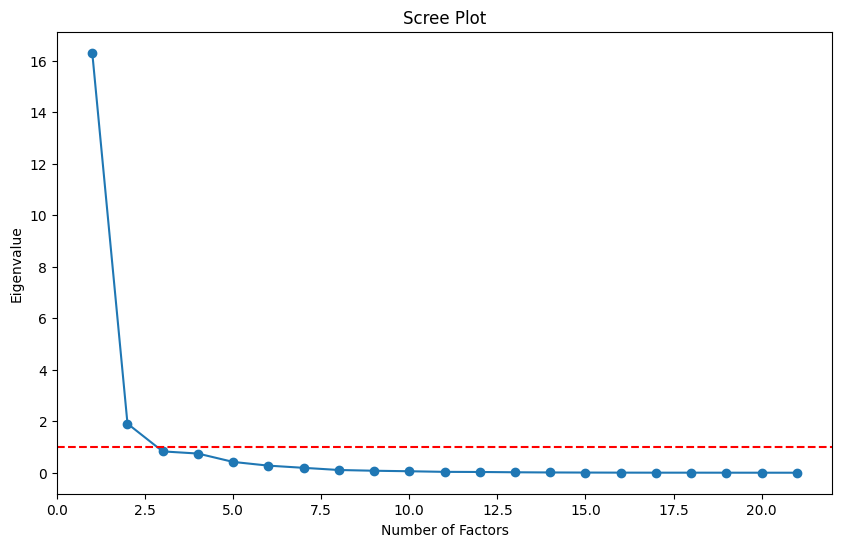

Number of factors based on Kaiser criterion: 2


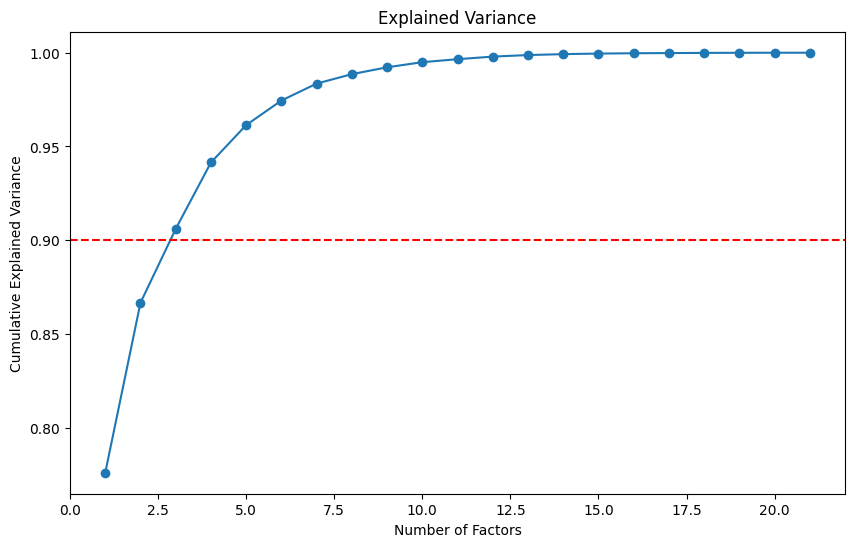

Number of factors needed to explain 90% of the variance: 3


In [171]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform PCA to get eigenvalues and plot scree plot and explained variance
pca = PCA()
pca.fit(df_scaled)
eigenvalues = pca.explained_variance_

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

n_factors_kaiser = sum(eigenvalues > 1)
print(f'Number of factors based on Kaiser criterion: {n_factors_kaiser}')

# Explained Variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Explained Variance')
plt.xlabel('Number of Factors')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.show()

n_factors_variance = np.argmax(cumulative_explained_variance >= 0.9) + 1
print(f'Number of factors needed to explain 90% of the variance: {n_factors_variance}')

## Kaiser Criterion and Scree Plot:

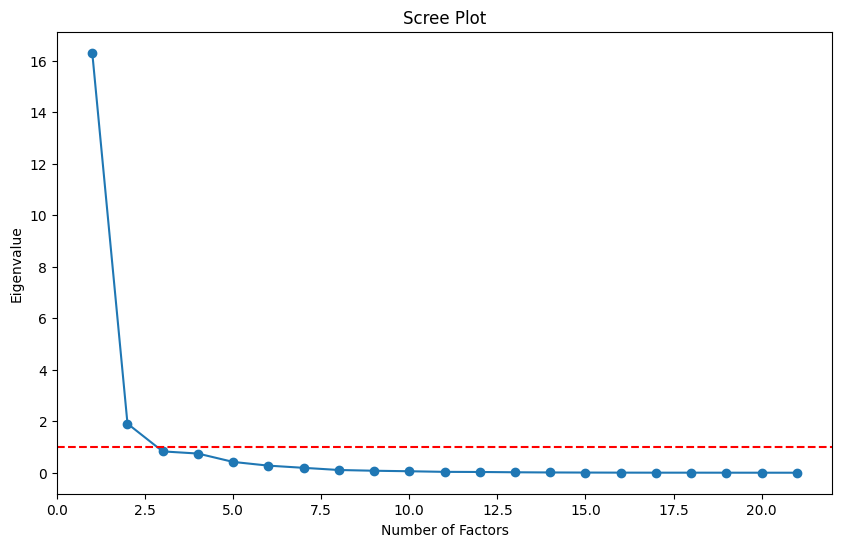

Number of factors based on Kaiser criterion: 2


In [172]:
# Perform PCA to get eigenvalues.
# Plot Scree Plot and explained variance to determine the number of components.

# Kaiser Criterion and Scree Plot
# Visualize the eigenvalues to decide how many principal components to retain based on the Kaiser criterion (eigenvalue > 1).

pca = PCA()
pca.fit(df_scaled)
eigenvalues = pca.explained_variance_

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

n_factors_kaiser = sum(eigenvalues > 1)
print(f'Number of factors based on Kaiser criterion: {n_factors_kaiser}')

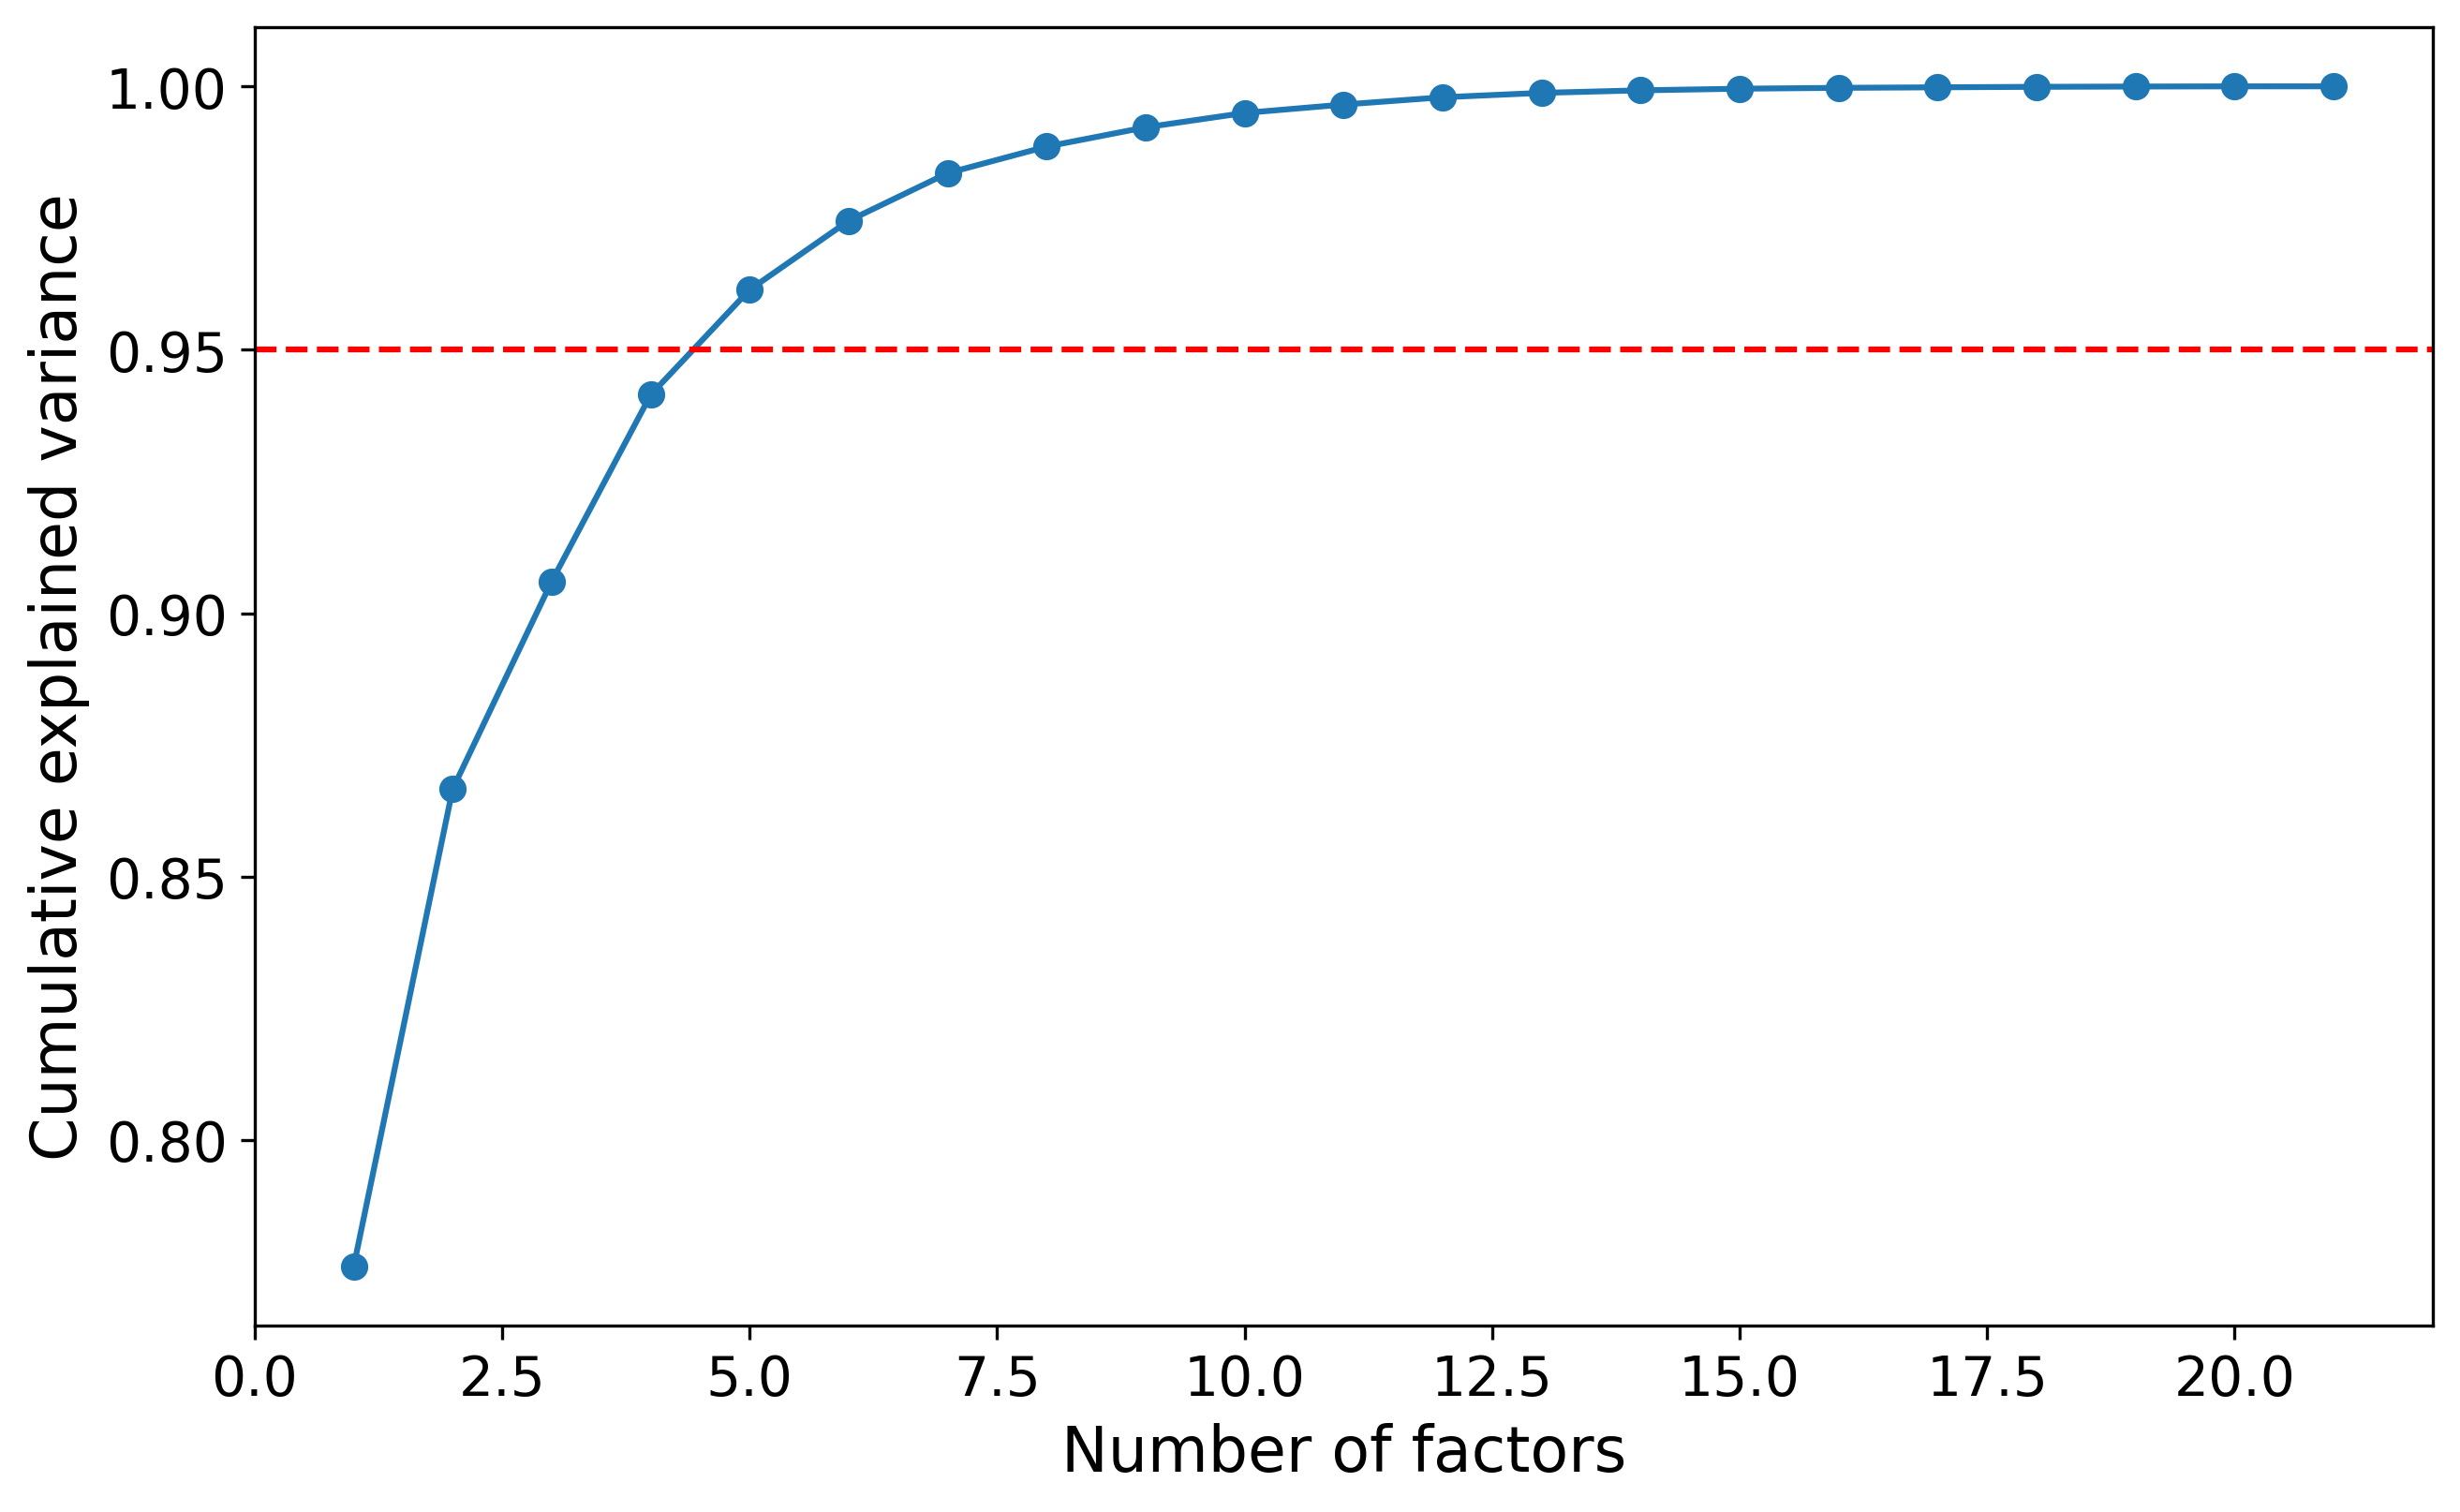

Number of factors needed to explain 95% of the variance: 4


In [175]:
# Explained Variance
# Determine the number of components needed to explain 90% of the variance.
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
#plt.title('Explained Variance')
plt.xlabel('Number of factors', fontsize=16)
plt.ylabel('Cumulative explained variance', fontsize=16)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

n_factors_variance = np.argmax(cumulative_explained_variance >= 0.95) 
print(f'Number of factors needed to explain 95% of the variance: {n_factors_variance}')

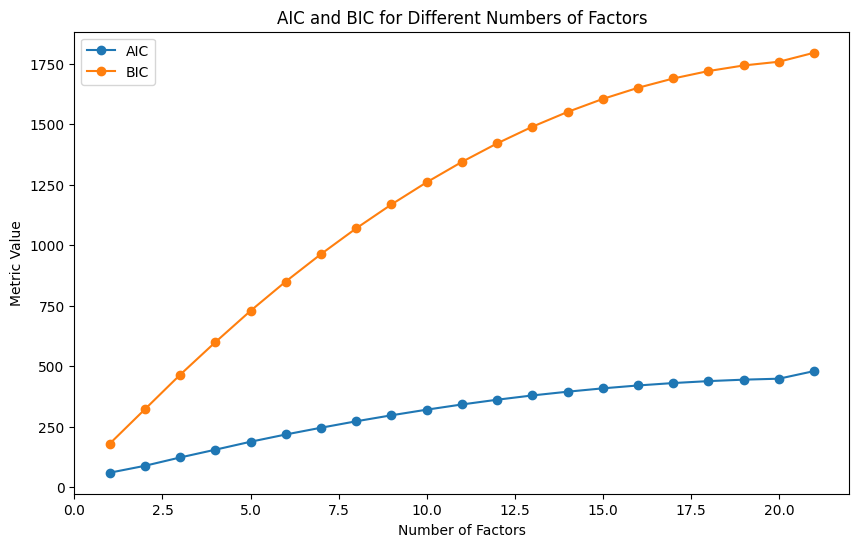

In [176]:
# Calculate BIC, AIC, and other metrics for Factor Analysis models with different number of factors
n_factors=7
results = []
for n_factors in range(1, len(df.columns) + 1):
    fa = FactorAnalysis(n_components=n_factors)
    fa.fit(df_scaled)
    log_likelihood = fa.score(df_scaled)
    n_parameters = n_factors * df.shape[1] - 0.5 * n_factors * (n_factors - 1)
    aic = -2 * log_likelihood + 2 * n_parameters
    bic = -2 * log_likelihood + n_parameters * np.log(df.shape[0])
    results.append({'n_factors': n_factors, 'log_likelihood': log_likelihood, 'AIC': aic, 'BIC': bic})

results_df = pd.DataFrame(results)

# Plot BIC and AIC
plt.figure(figsize=(10, 6))
plt.plot(results_df['n_factors'], results_df['AIC'], marker='o', label='AIC')
plt.plot(results_df['n_factors'], results_df['BIC'], marker='o', label='BIC')
plt.title('AIC and BIC for Different Numbers of Factors')
plt.xlabel('Number of Factors')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

In [177]:
results_df

,n_factors,log_likelihood,AIC,BIC
0,1,-8.793289,59.586578,179.254716
1,2,-3.083200,88.166400,321.804194
2,3,-1.305590,122.611181,464.520148
3,4,0.611115,154.777771,599.259428
4,5,1.173263,187.653474,729.009339
5,6,2.152657,217.694685,850.226275
6,7,3.186442,245.627115,963.635947
7,8,3.848093,272.303813,1070.091404
8,9,4.477307,297.045385,1168.913252
9,10,4.845487,320.309026,1260.558686


## Plot PCA Loadings

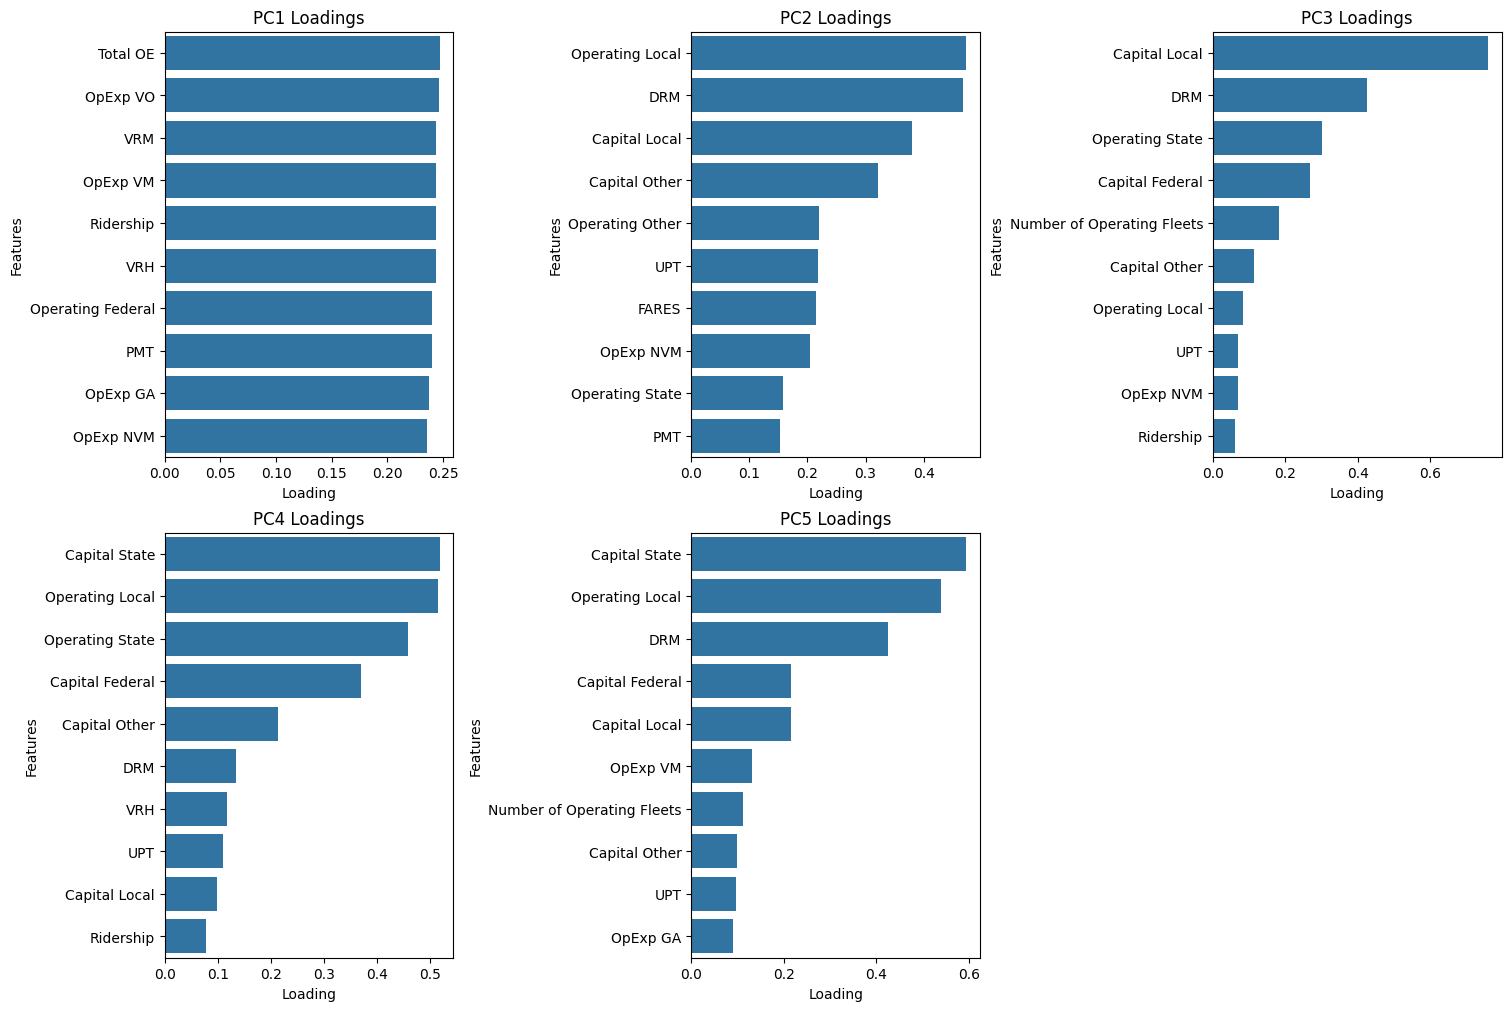

In [179]:
n_factors=5

# Principal Component Analysis with selected components
pca_selected = PCA(n_components=n_factors)
pca_transformed = pca_selected.fit_transform(df_scaled)

# Extract PCA loadings
selected_loadings = pd.DataFrame(pca_selected.components_.T, columns=[f'PC{i+1}' for i in range(n_factors)], index=numerical_cols)


# Extract PCA loadings
selected_loadings = pd.DataFrame(pca_selected.components_.T, columns=[f'PC{i+1}' for i in range(n_factors)], index=numerical_cols)

# Plot PCA loadings for each component in a grid format
def plot_pca_loadings_grid(loadings, n_factors, top_n=10, cols=3,  dpi=300):
    rows = math.ceil(n_factors / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows), constrained_layout=True)
    axes = axes.flatten()
    
    for i in range(n_factors):
        sorted_loadings = loadings.iloc[:, i].abs().sort_values(ascending=False)
        top_loadings = sorted_loadings.head(top_n)
        sns.barplot(x=top_loadings.values, y=top_loadings.index, ax=axes[i])
        axes[i].set_title(f'PC{i+1} Loadings')
        axes[i].set_xlabel('Loading')
        axes[i].set_ylabel('Features')
    
    # Hide any empty subplots
    for j in range(n_factors, len(axes)):
        fig.delaxes(axes[j])
    
    plt.show()

plot_pca_loadings_grid(selected_loadings, n_factors, top_n=10, cols=3)


## Plot feature importances:

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


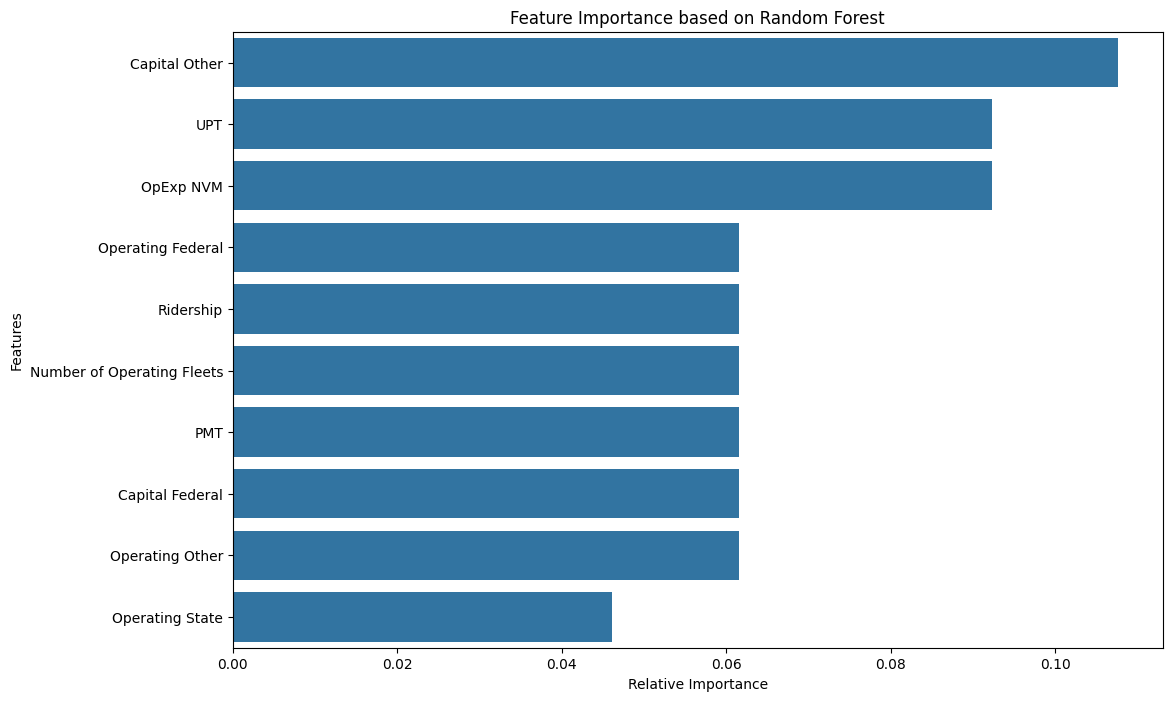

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(df_scaled)

# Fit the RandomForestClassifier using the scaled data and cluster labels
rf = RandomForestClassifier(random_state=42)
rf.fit(df_scaled, clusters_kmeans)

# Extract feature importances (top 10 features)
importances = pd.DataFrame({
    'Feature': numerical_cols,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importance based on Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

## Factor analysis

In [182]:
# Factor Analysis
#n_factors = math.ceil((n_factors_kaiser + n_factors_variance) / 2)
n_factors=5
fa = FactorAnalysis(n_components=n_factors, random_state=42)
factors = fa.fit_transform(df_scaled)
loadings = pd.DataFrame(fa.components_.T, columns=[f'Factor_{i+1}' for i in range(n_factors)], index=numerical_cols)
print(loadings.head())

                   Factor_1  Factor_2  Factor_3  Factor_4  Factor_5
Operating Federal  0.973288 -0.131262 -0.015686 -0.021580  0.054681
Operating State    0.768153  0.633582 -0.076609 -0.039760  0.001646
Operating Local    0.463983  0.043365  0.482692  0.456680 -0.276154
Operating Other    0.945962 -0.175437 -0.145146 -0.192975  0.044100
Capital Federal    0.779567  0.224026  0.025240 -0.025966 -0.031685


In [183]:
num_rows, num_columns = factors.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 2205
Number of columns: 5


## Using the transformed data from the PCA for clustering.

###  Using the Elbow method to determine the optimal number of clusters

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

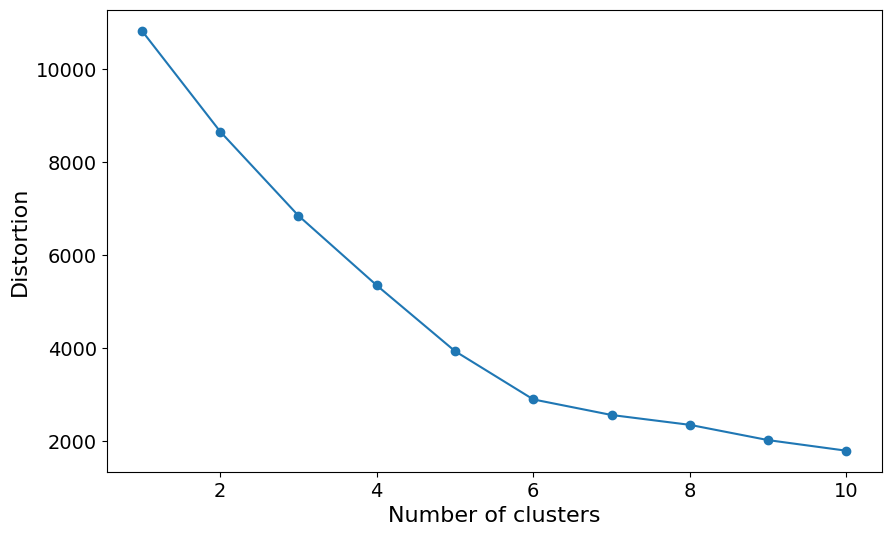

In [184]:
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(factors)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, distortions, marker='o')
#plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('Distortion', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


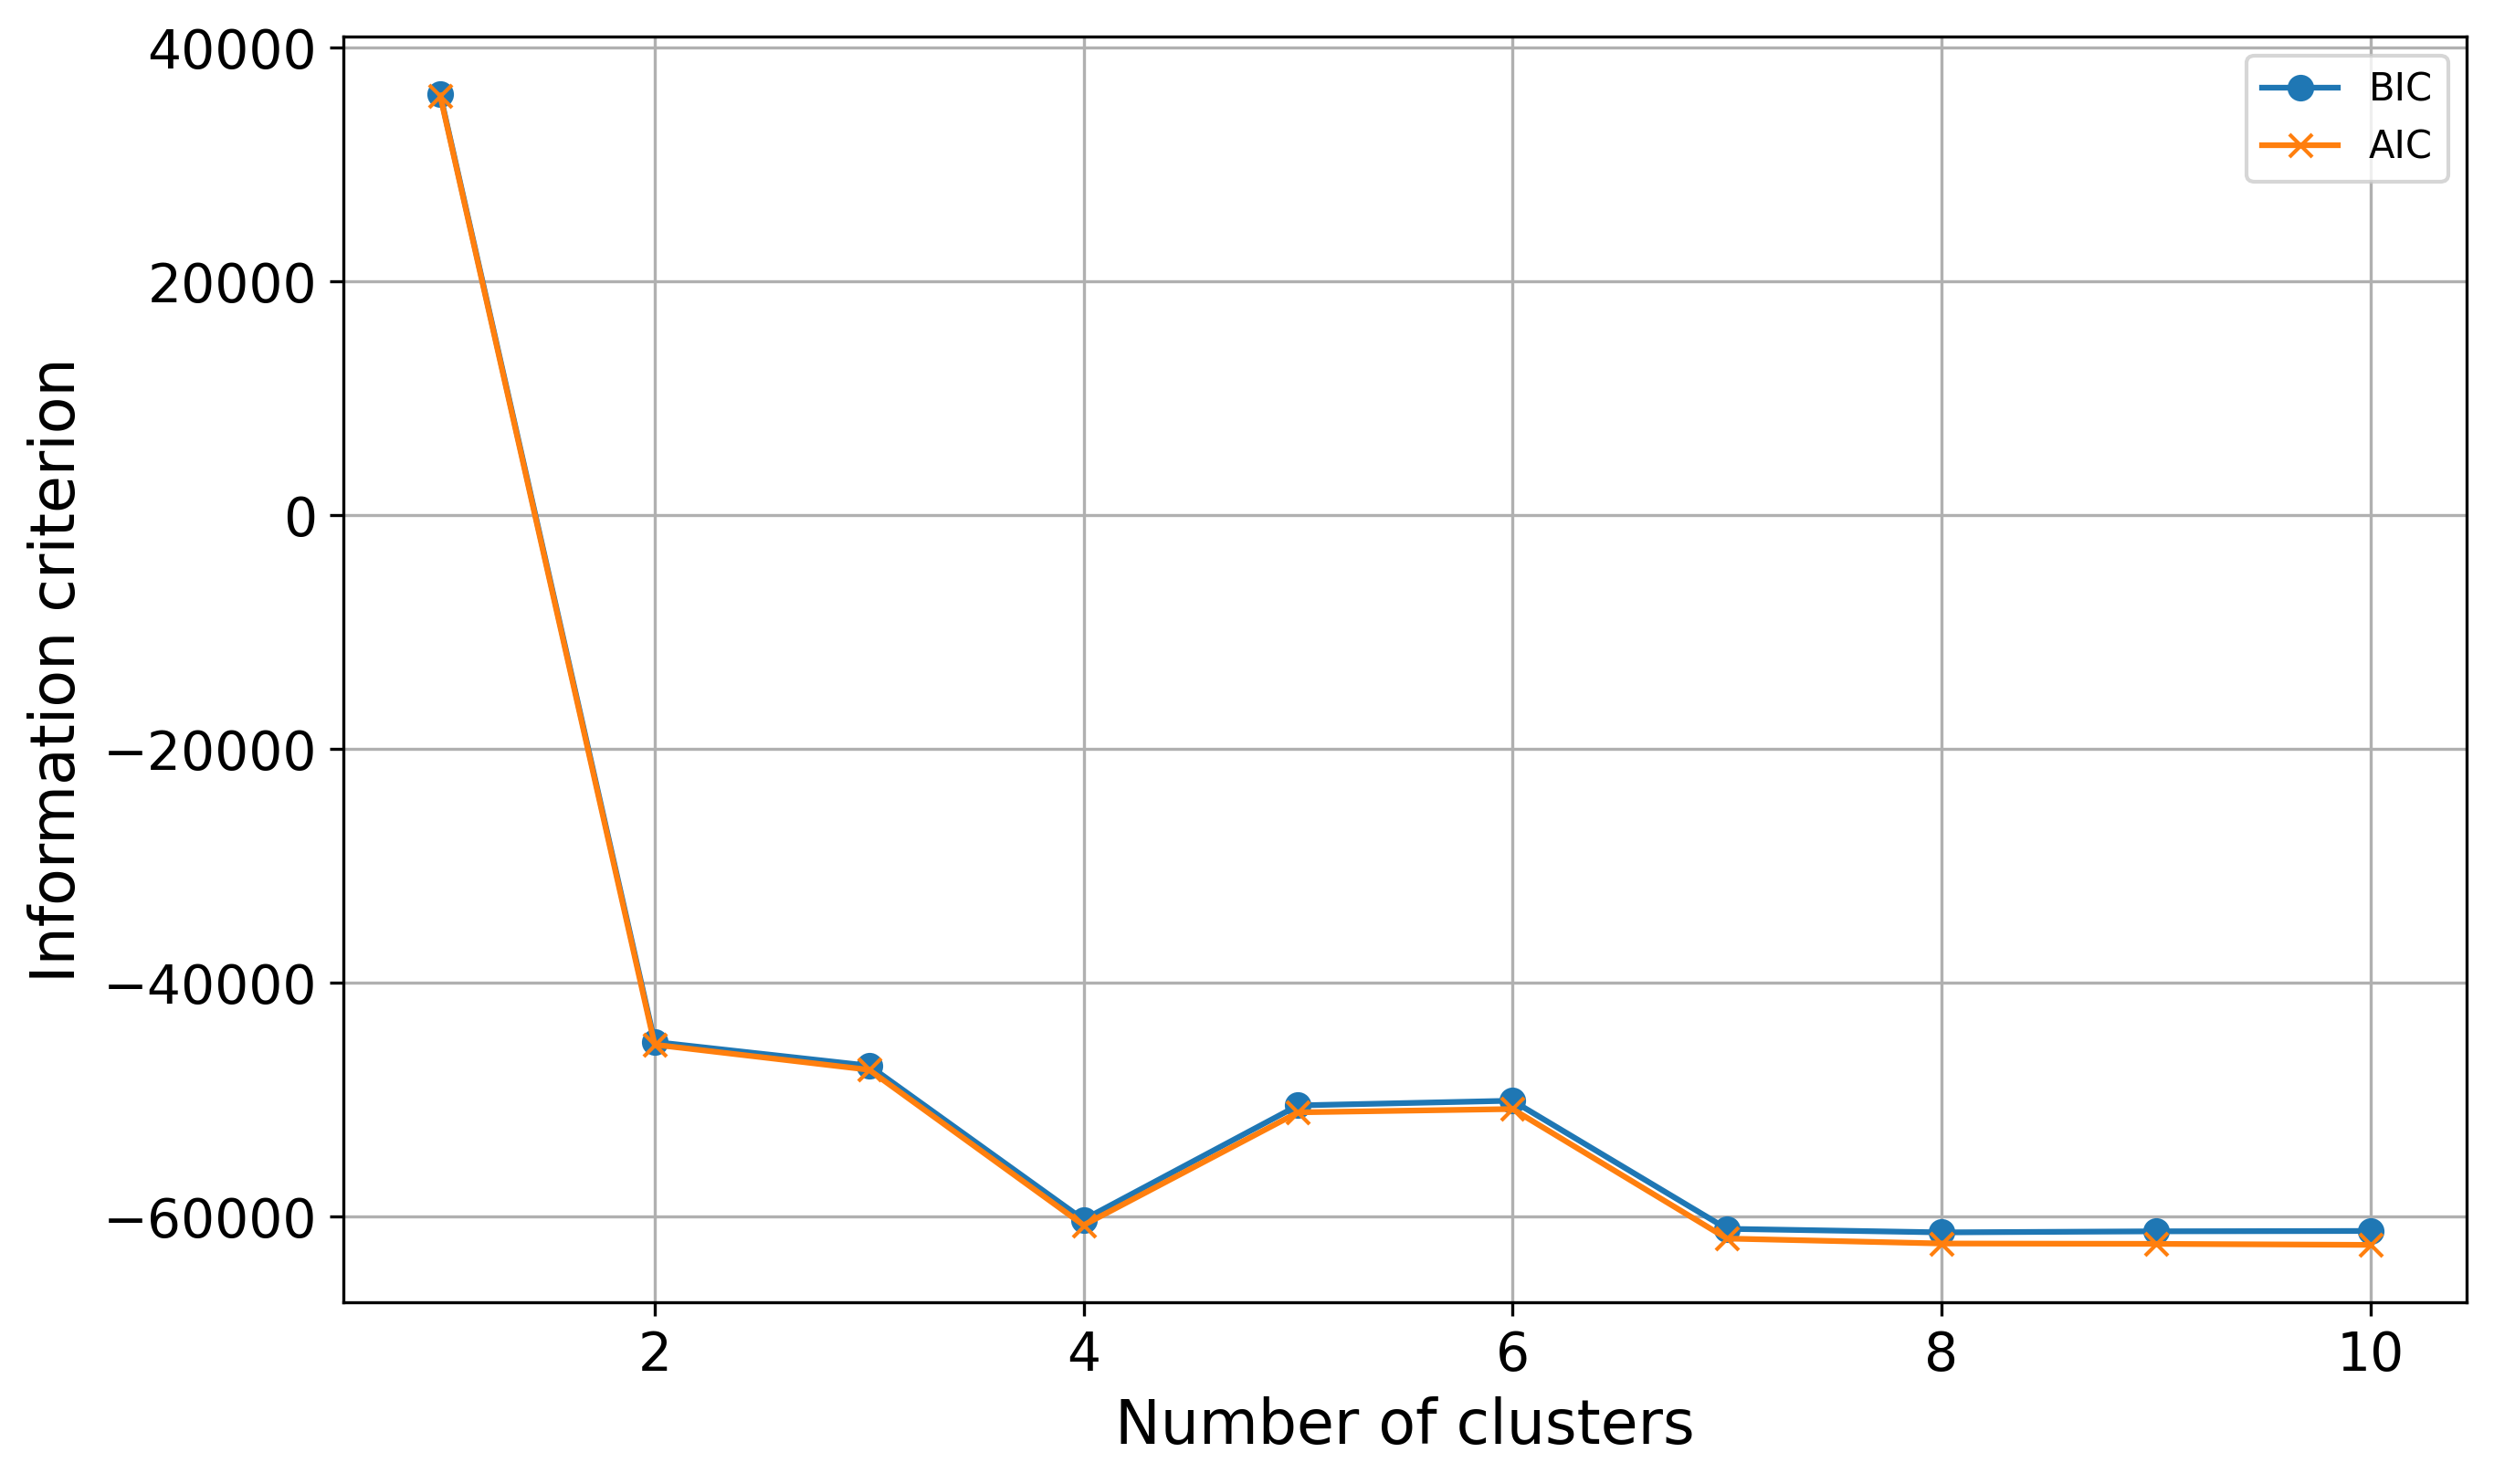

In [185]:
# Create an elbow plot using GMM and BIC
bic = []
aic = []
K = range(1, 11)
for k in K:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(pca_transformed)
    bic.append(gmm.bic(pca_transformed))
    aic.append(gmm.aic(pca_transformed))

plt.figure(figsize=(10, 6), dpi=300)
plt.plot(K, bic, marker='o', label='BIC')
plt.plot(K, aic, marker='x', label='AIC')
#plt.title('Elbow Method for Optimal Number of Clusters (GMM)')
plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('Information criterion', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

## K-Means Clustering

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


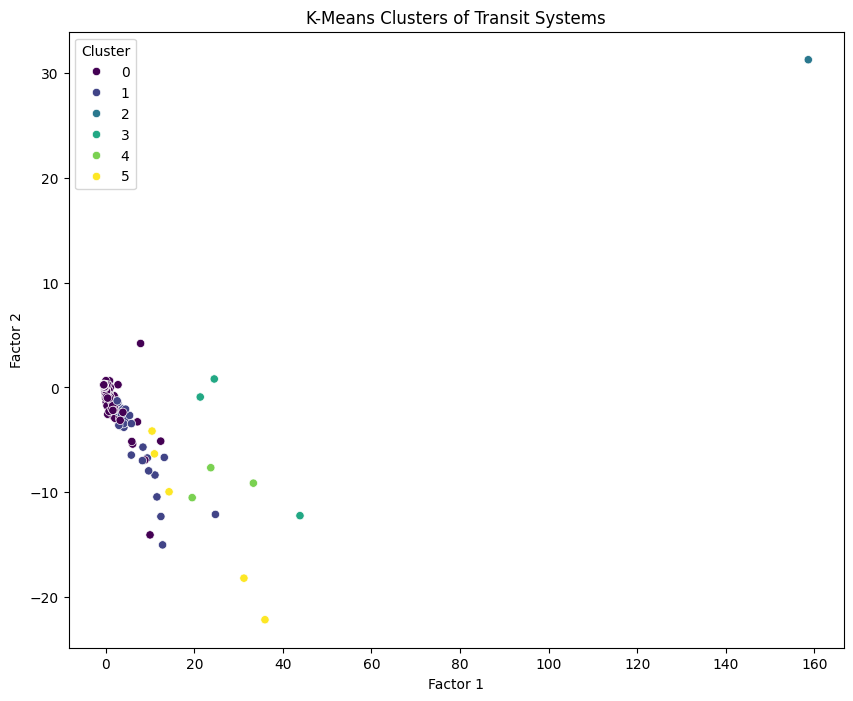

In [186]:
# K-Means Clustering
kmeans = KMeans(n_clusters=6, random_state=42)
clusters_kmeans = kmeans.fit_predict(factors)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=clusters_kmeans, palette='viridis')
plt.title('K-Means Clusters of Transit Systems')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend(title='Cluster')
plt.show()


In [187]:
## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

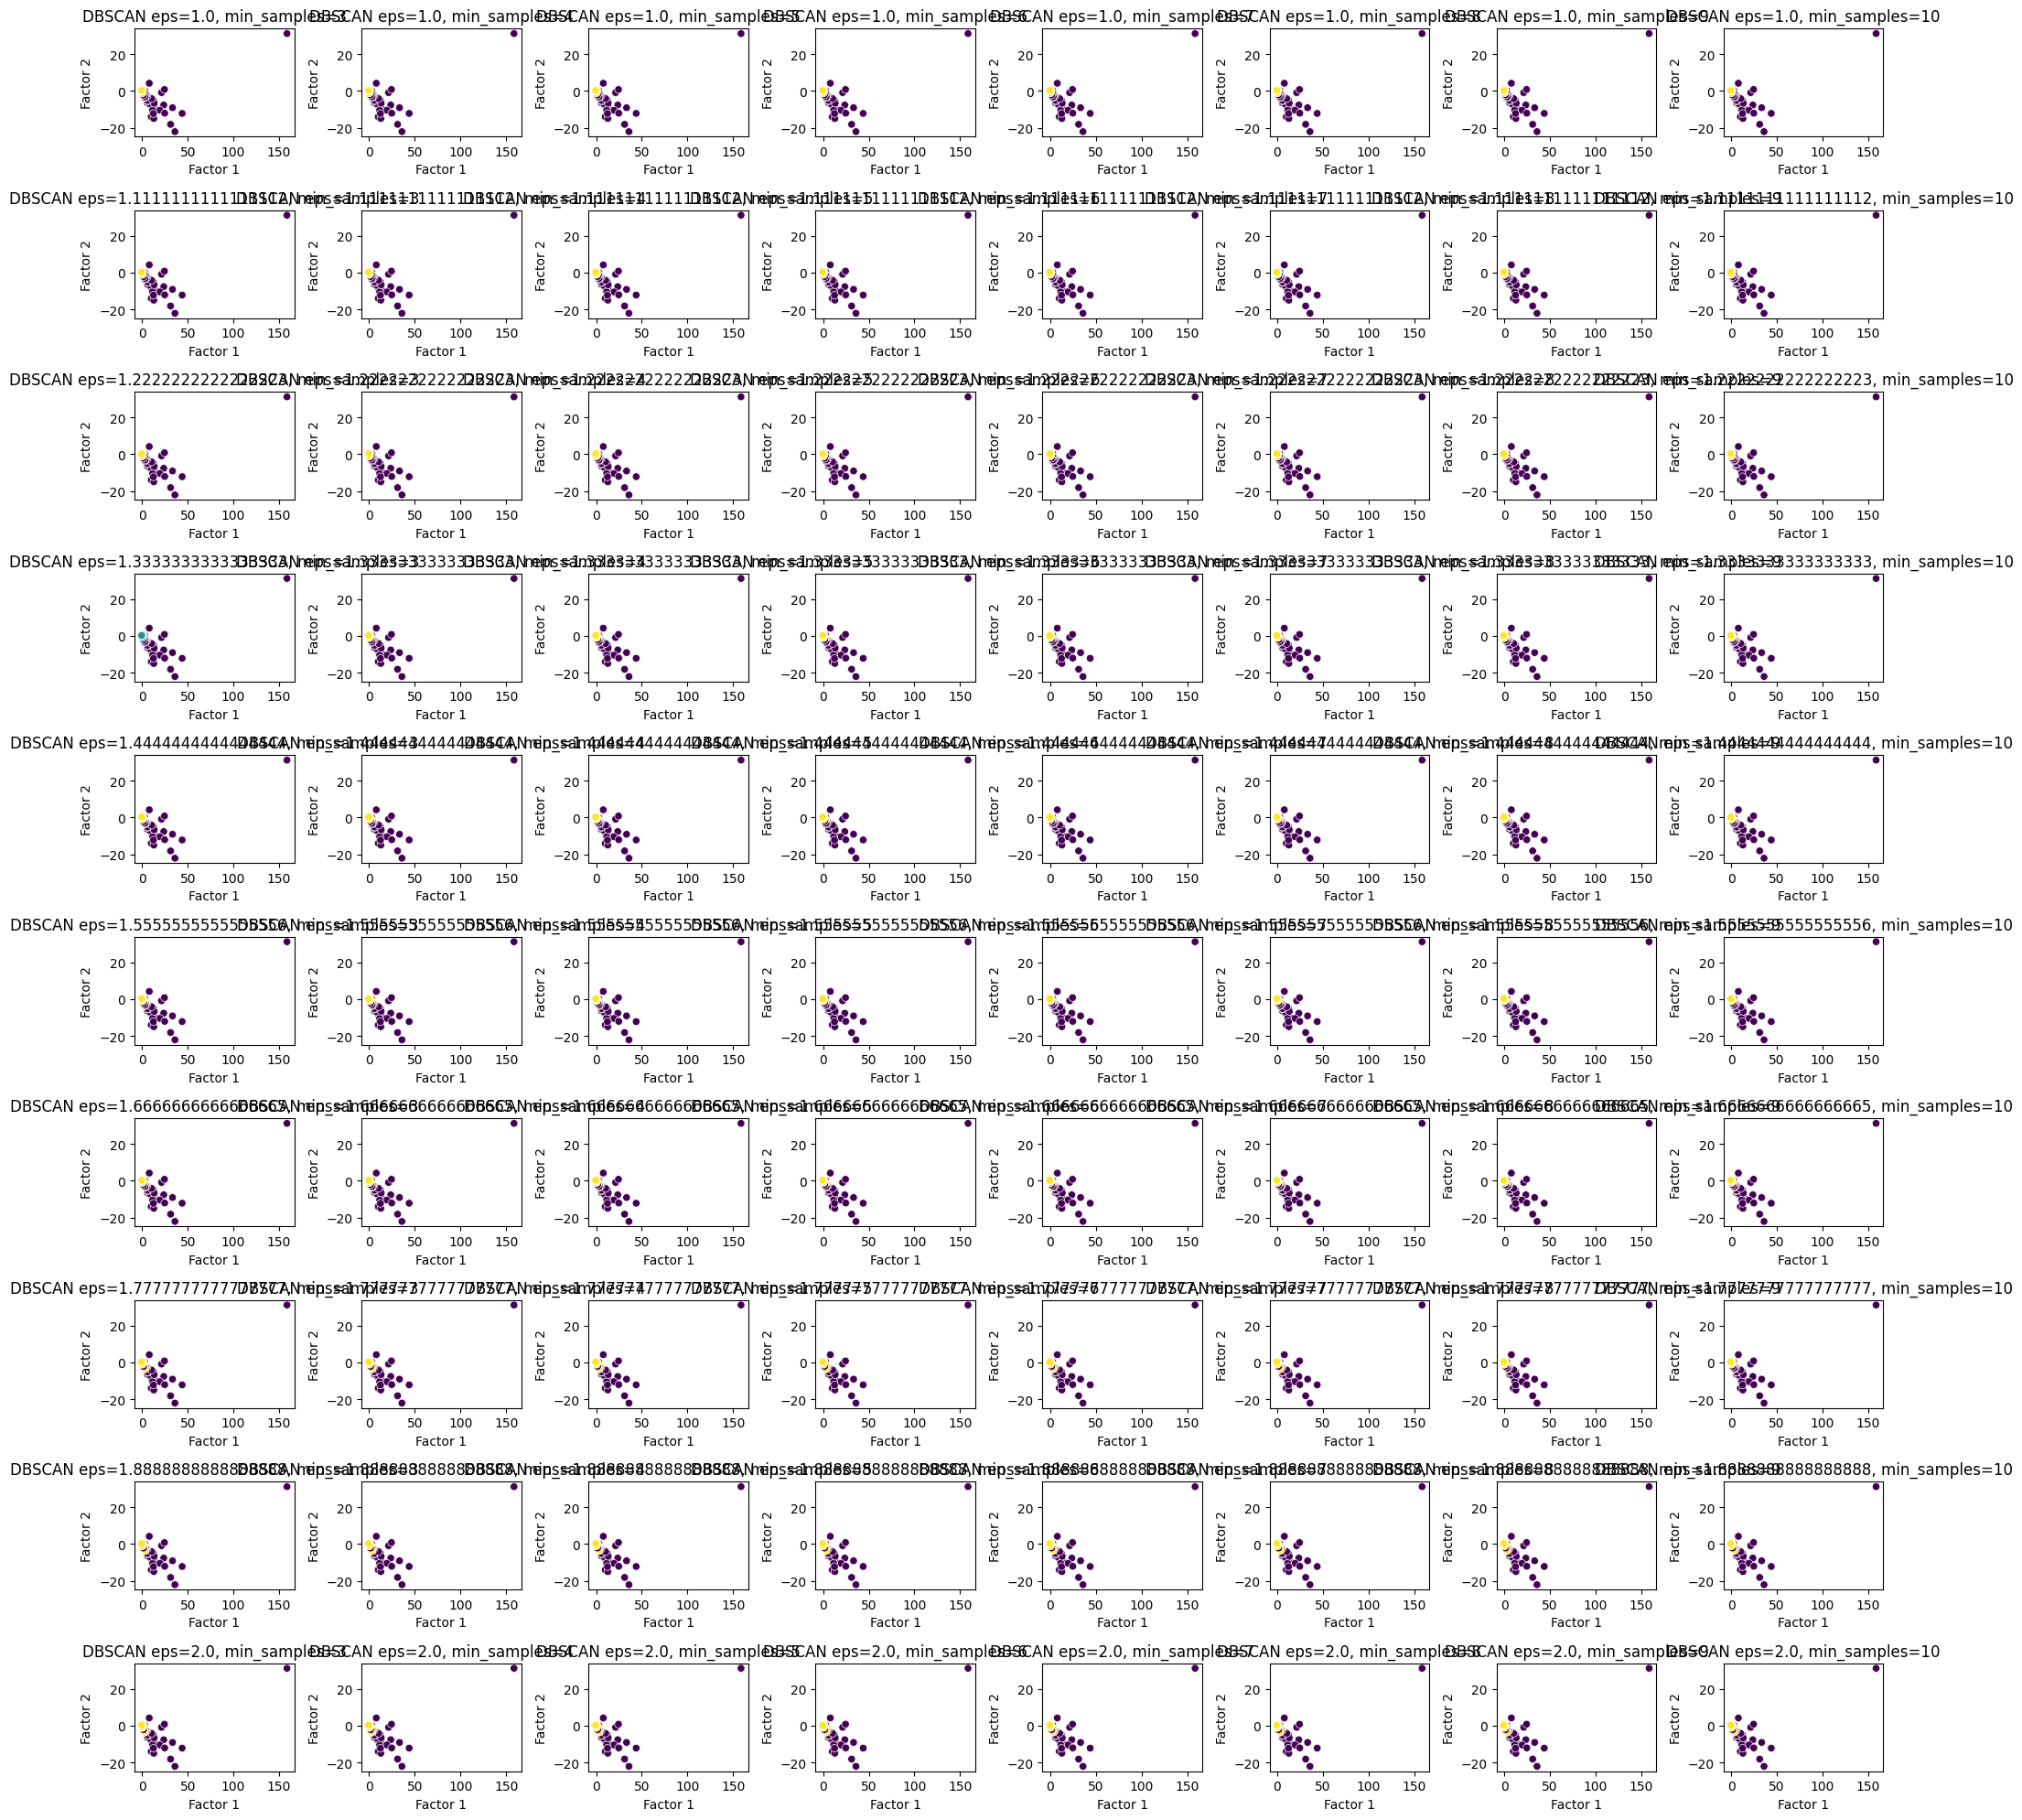

In [188]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering with fine-tuning
# Epsilon (eps): The maximum distance between two points for one to be considered as in the neighborhood of the other.
# Min Samples: The minimum number of points to form a dense region (including the point itself).

eps_values = np.linspace(1, 2, 10)
min_samples_values = range(3, 11)
fig, axs = plt.subplots(len(eps_values), len(min_samples_values), figsize=(20, 20))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_dbscan = dbscan.fit_predict(pca_transformed)
        sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=clusters_dbscan, palette='viridis', ax=axs[i, j], legend=None)
        axs[i, j].set_title(f'DBSCAN eps={eps}, min_samples={min_samples}')
        axs[i, j].set_xlabel('Factor 1')
        axs[i, j].set_ylabel('Factor 2')

plt.tight_layout()
plt.show()


In [190]:
### Analyze DBSCAN results:
# eps=1.0, min_samples=10: Shows very compact clusters, but might be too tight, potentially treating many points as noise.
# eps=2.0, min_samples=3: Shows more spread-out clusters with fewer noise points, which might be a good balance.
# Small eps Values: Tend to create many small clusters and classify many points as noise. If clusters are too small or many points are noise, increase eps.
# Large eps Values: Tend to merge clusters together, potentially losing finer structure in the data. If clusters merge too much, decrease eps.
# Small min_samples Values: Can create more clusters, including small ones. If too many clusters, increase min_samples.
# Large min_samples Values: Tend to create larger clusters and treat more points as noise. If too few clusters, decrease min_samples.

In [191]:
## Silhouette Score Calculation

from sklearn.metrics import silhouette_score

best_score = -1
best_params = (0, 0)
eps_values = np.linspace(1, 2, 10)
min_samples_values = range(3, 11)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_dbscan = dbscan.fit_predict(pca_transformed)
        if len(set(clusters_dbscan)) > 1:  # To avoid silhouette score error with single cluster
            score = silhouette_score(pca_transformed, clusters_dbscan)
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

print(f'Best DBSCAN params: eps={best_params[0]}, min_samples={best_params[1]} with Silhouette Score: {best_score}')


Best DBSCAN params: eps=1.8888888888888888, min_samples=3 with Silhouette Score: 0.9568246081941821


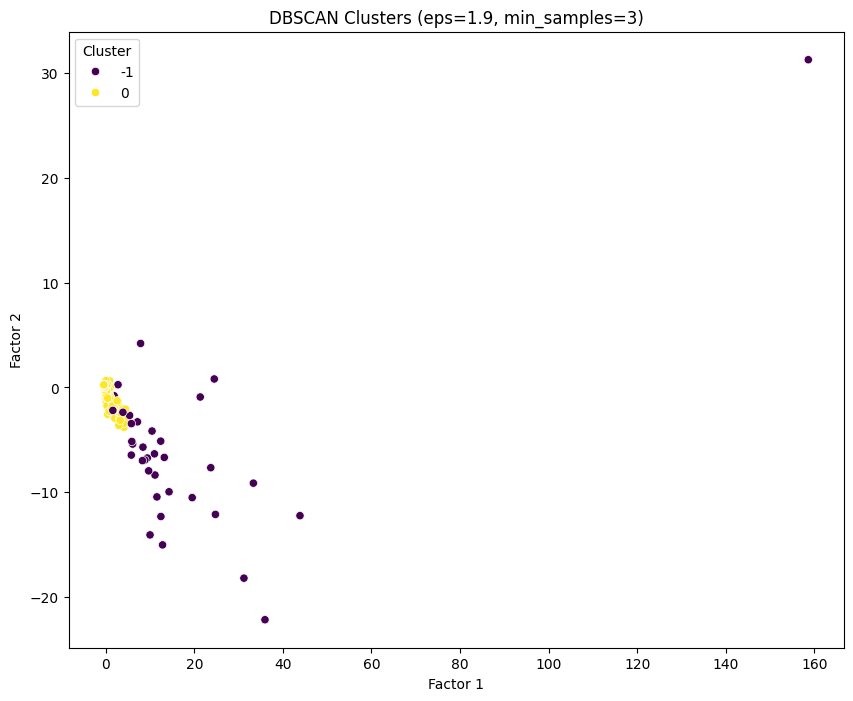

In [192]:
# Best DBSCAN parameters
best_eps = 1.9
best_min_samples = 3

# Perform DBSCAN with best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters_dbscan = dbscan.fit_predict(pca_transformed)

# Visualize the DBSCAN clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=clusters_dbscan, palette='viridis')
plt.title(f'DBSCAN Clusters (eps={best_eps}, min_samples={best_min_samples})')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend(title='Cluster')
plt.show()
# Cluster 0: The points marked in yellow.
# Noise (-1): The points marked in purple. These are considered noise points by DBSCAN and do not belong to any cluster.

## GMM

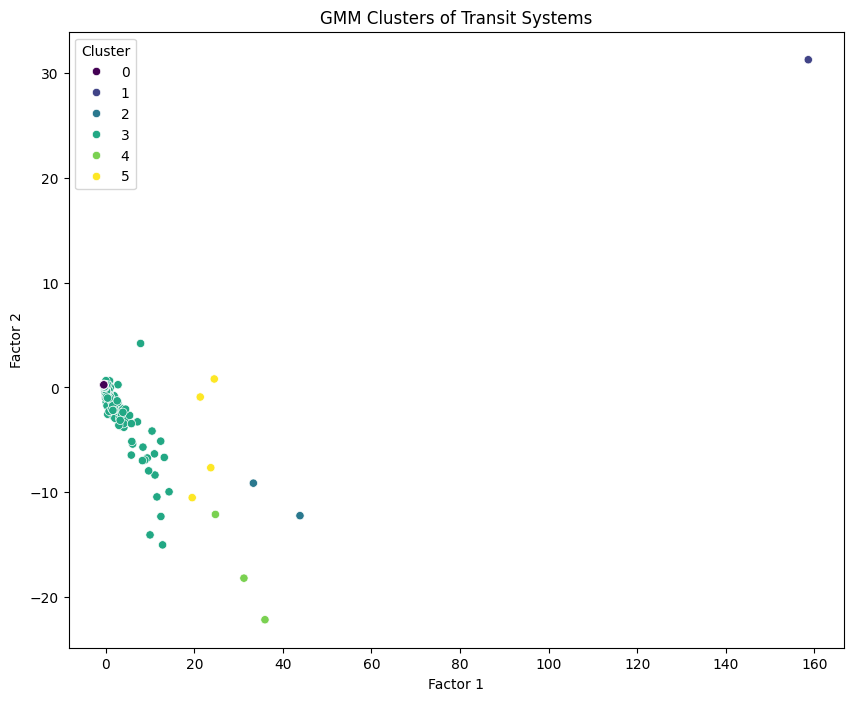

In [193]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=6, random_state=42)
clusters_gmm = gmm.fit_predict(pca_transformed)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=clusters_gmm, palette='viridis')
plt.title('GMM Clusters of Transit Systems')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend(title='Cluster')
plt.show()


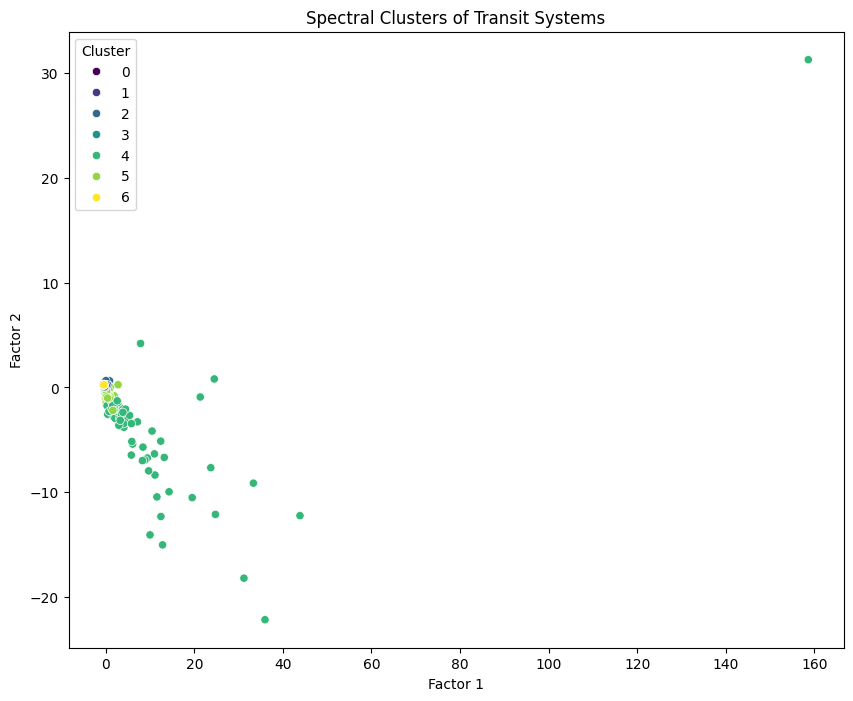

In [194]:
from sklearn.cluster import SpectralClustering

# Spectral Clustering
spectral = SpectralClustering(n_clusters=7, affinity='nearest_neighbors', random_state=42)
clusters_spectral = spectral.fit_predict(pca_transformed)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=clusters_spectral, palette='viridis')
plt.title('Spectral Clusters of Transit Systems')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend(title='Cluster')
plt.show()


In [195]:
# Output the dataframe with clusters
df['Cluster_DBSCAN'] = clusters_dbscan
df['Cluster_GMM'] = clusters_gmm
df['Cluster_Spectral'] = clusters_spectral
df['Cluster_KMeans'] = clusters_kmeans

output_path = 'NTD_Clustered_Data.csv'
df.to_csv(output_path, index=False)
df


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_26600\2470574448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster_DBSCAN'] = clusters_dbscan
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_26600\2470574448.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster_GMM'] = clusters_gmm
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_26600\2470574448.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Operating Federal,Operating State,Operating Local,Operating Other,Capital Federal,Capital State,Capital Local,Capital Other,Number of Operating Fleets,Ridership,...,FARES,DRM,VRM,VRH,UPT,PMT,Cluster_DBSCAN,Cluster_GMM,Cluster_Spectral,Cluster_KMeans
Agency,,,,,,,,,,,,,,,,,,,,,
"King County Department of Metro Transit, dba: King County Metro",126313019.0,17798927.0,573912810.0,266339342.0,35398236.0,22300662.0,97008549.0,9939102.0,18261.0,51015415.0,...,110193783.0,1723.79,44527766.0,3902037.0,66445408.0,255184734.0,-1,3,4,5
Spokane Transit Authority,31270192.0,1708713.0,51822996.0,9554657.0,12159213.0,674190.0,27455824.0,0.0,1116.0,10296150.0,...,6914112.0,958.10,9410066.0,620938.0,6995911.0,33388468.0,0,3,4,0
Pierce County Transportation Benefit Area Authority,40262064.0,2058990.0,37023952.0,63377478.0,3949421.0,5183835.0,36622271.0,0.0,1910.0,9841274.0,...,10830732.0,516.68,8973273.0,585032.0,5548156.0,33831615.0,0,3,4,0
Confederated Tribes of the Colville Indian Reservation,1490917.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.00,76622.0,7290.0,135939.0,0.0,0,0,6,0
"City of Everett, dba: EVERETT TRANSIT",12787325.0,993691.0,6623445.0,3385223.0,179716.0,224413.0,540939.0,0.0,84.0,1625002.0,...,810229.0,118.40,1446138.0,120693.0,1072281.0,4141886.0,0,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Payson Senior Center,174873.0,0.0,30519.0,3581.0,0.0,0.0,0.0,0.0,2.0,0.0,...,3581.0,0.00,70736.0,5072.0,4310.0,0.0,0,0,3,0
Calaveras Transit Agency,275920.0,339983.0,445640.0,81711.0,0.0,72083.0,0.0,0.0,22.0,0.0,...,39175.0,0.00,306606.0,12313.0,20460.0,0.0,0,0,6,0
Elk Valley Rancheria,28844.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.00,936.0,23.0,60.0,0.0,0,0,1,0


## Final analysis:

#### KMeans Clustering:
####    Clusters Identified: 6 clusters.
####    Cluster Separation: Clusters are somewhat distinct, but there seems to be some overlap, especially in the dense lower-left region.
####    Interpretation: KMeans assumes spherical clusters of similar sizes, which might not be ideal for your data given the overlap and spread.\

#### DBSCAN Clustering:
####     Clusters Identified: 1 cluster and several noise points.
####    Cluster Separation: One dense cluster with several points identified as noise.
####    Interpretation: DBSCAN is effective at identifying outliers but may struggle with datasets that have varying cluster densities.

#### Gaussian Mixture Model (GMM) Clustering:
####    Clusters Identified: 7 clusters.
####    Cluster Separation: Similar to KMeans, with some overlap in the lower-left region.
####    Interpretation: GMM can model elliptical clusters and may provide more flexibility than KMeans, but the overlap suggests some clusters are not well-separated.

#### Spectral Clustering:
####    Clusters Identified: 7 clusters.
####    Cluster Separation: Similar separation to KMeans and GMM, with some overlap.
####    Interpretation: Spectral Clustering can capture complex cluster structures, but in this case, it seems to produce results similar to KMeans and GMM.
    
#### Given the current results, Gaussian Mixture Model (GMM) appears to be the best choice. It offers flexibility in cluster shape (elliptical clusters) and handles overlap better than KMeans.

<Figure size 1920x1440 with 0 Axes>

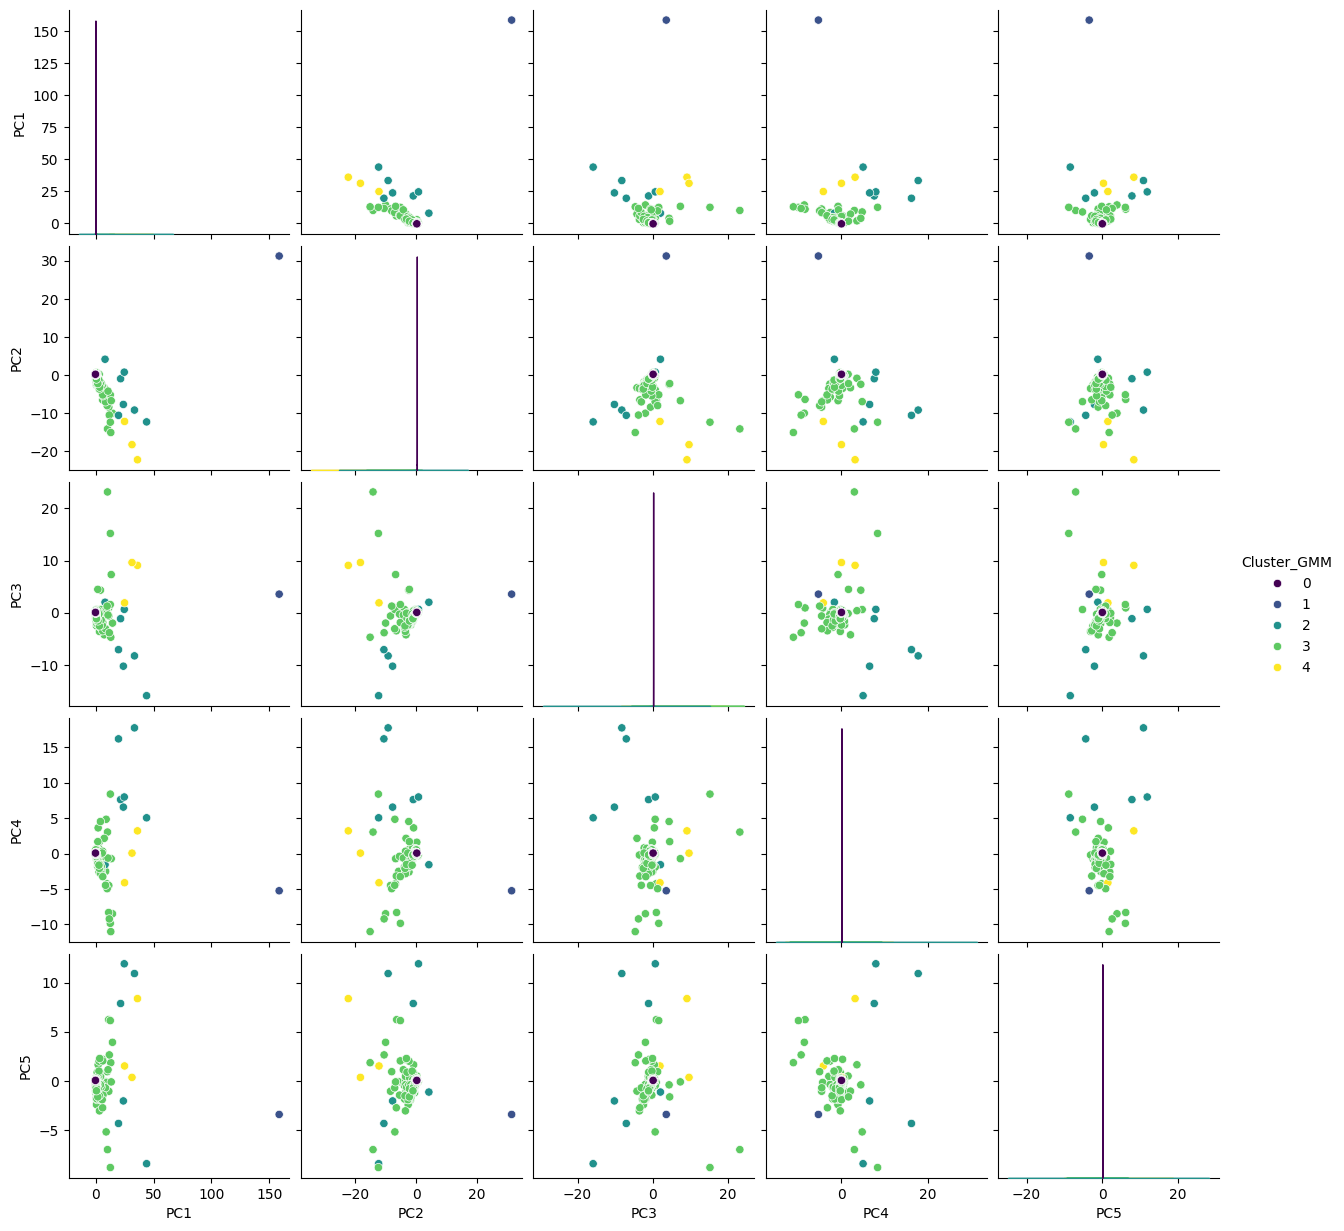

In [204]:
# Convert the PCA transformed data to a DataFrame for easier plotting
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(n_factors)])

# Best GMM parameters
n_components = 5
gmm = GaussianMixture(n_components=n_components, random_state=42)
clusters_gmm = gmm.fit_predict(pca_transformed)

plt.figure(dpi=300)  

# Add the clusters to the DataFrame
pca_df['Cluster_GMM'] = clusters_gmm

# Visualize the GMM clusters with pairplot
sns.pairplot(pca_df, hue='Cluster_GMM', palette='viridis', diag_kind='kde')
#plt.suptitle('GMM Clusters of Transit Systems', y=1.02)
plt.show()

## Additional analysis and plots

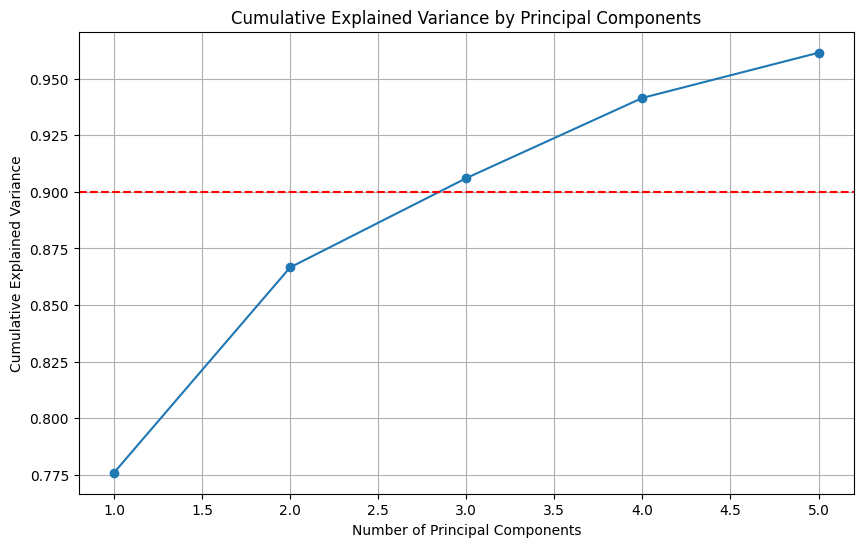

In [197]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca_selected.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_factors + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.grid(True)
plt.show()


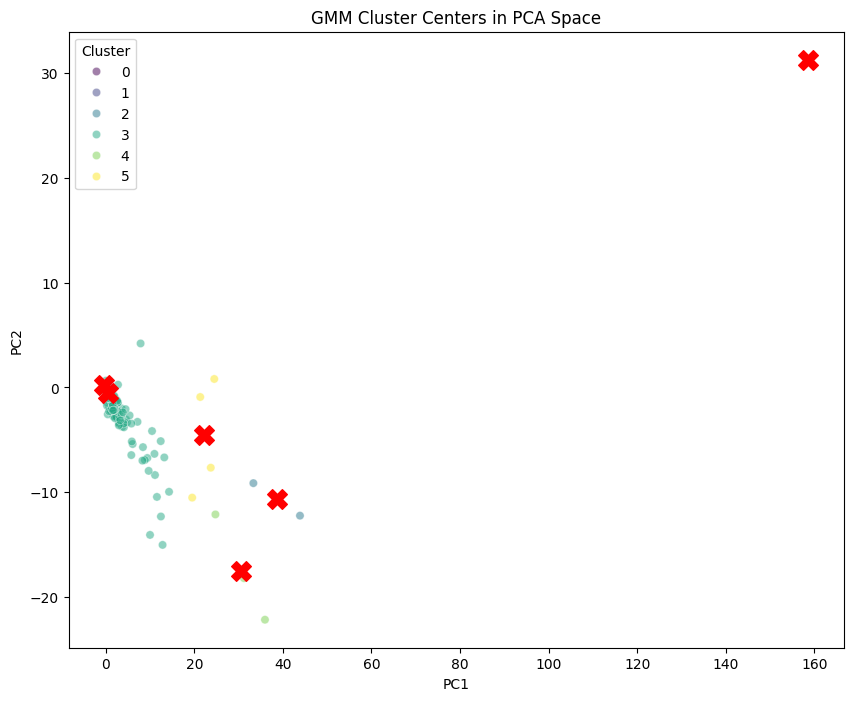

In [198]:
# Plot cluster centers in PCA space
cluster_centers = gmm.means_

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=clusters_gmm, palette='viridis', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.title('GMM Cluster Centers in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()


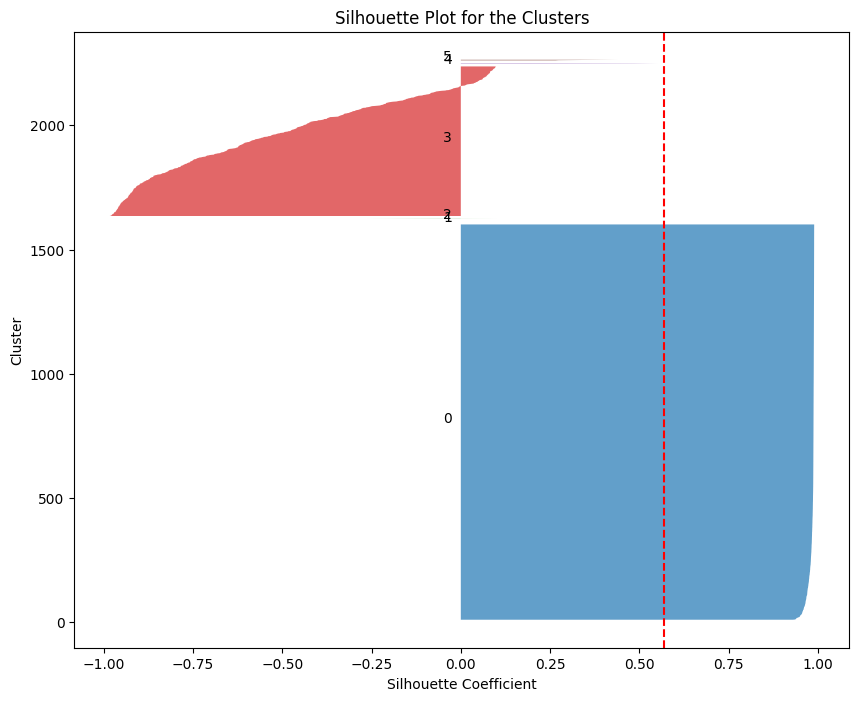

Average silhouette score: 0.57


In [199]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate silhouette scores
silhouette_vals = silhouette_samples(pca_transformed, clusters_gmm)
silhouette_avg = silhouette_score(pca_transformed, clusters_gmm)

# Plot silhouette scores
plt.figure(figsize=(10, 8))
y_lower = 10
for i in range(n_components):
    ith_cluster_silhouette_values = silhouette_vals[clusters_gmm == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title('Silhouette Plot for the Clusters')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.show()

print(f'Average silhouette score: {silhouette_avg:.2f}')


In [ ]:
# Data Cleaning and Scaling
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(0)
df_scaled = StandardScaler().fit_transform(df[numerical_cols])

# Factor Analysis with n_factors=10
n_factors = 10
fa = FactorAnalysis(n_components=n_factors, random_state=42)
factors = fa.fit_transform(df_scaled)

# Gaussian Mixture Model Clustering
n_components = 7
gmm = GaussianMixture(n_components=n_components, random_state=42)
clusters_gmm = gmm.fit_predict(factors)

# Add cluster labels to the DataFrame
df['Cluster_GMM'] = clusters_gmm

# Summary statistics for each cluster
summary_stats = df.groupby('Cluster_GMM').mean()
summary_stats

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_26600\519682256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols] = df[numerical_cols].fillna(0)
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_26600\519682256.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster_GMM'] = clusters_gmm


,Operating Federal,Operating State,Operating Local,Operating Other,Capital Federal,Capital State,Capital Local,Capital Other,Number of Operating Fleets,Ridership,...,OpExp GA,FARES,DRM,VRM,VRH,UPT,PMT,Cluster_DBSCAN,Cluster_Spectral,Cluster_KMeans
Cluster_GMM,,,,,,,,,,,,,,,,,,,,,
0,6.049674e+05,2.132400e+05,2.550544e+05,1.521211e+05,9.452613e+04,2.890353e+04,2.417290e+04,3.913141e+03,18.315987,1.865517e+02,...,1.575273e+02,8.813527e+04,0.006144,2.692971e+05,1.646917e+04,5.942463e+04,7.822897e+02,0.000000,2.777429,0.000000
1,1.281951e+09,4.945906e+07,4.137405e+08,1.250230e+08,2.947677e+08,4.243017e+08,9.914288e+08,0.000000e+00,17563.000000,1.109327e+08,...,4.066824e+08,7.334459e+07,3575.270000,1.009543e+08,7.623970e+06,2.546881e+08,9.978927e+08,-1.000000,4.000000,5.000000
2,4.850084e+09,8.894599e+08,2.188634e+08,3.698285e+09,1.097343e+09,1.068810e+09,4.069425e+08,6.251111e+08,50095.000000,4.911068e+08,...,1.184962e+09,2.953133e+09,2693.780000,4.554836e+08,3.578826e+07,2.274142e+09,8.319104e+09,-1.000000,4.000000,2.000000
3,1.788640e+07,1.096027e+07,1.806730e+07,8.469425e+06,1.079231e+07,6.385047e+06,1.031618e+07,3.917862e+05,476.143573,4.766254e+06,...,1.061743e+07,6.705456e+06,358.050518,4.537342e+06,2.967514e+05,4.297114e+06,2.492506e+07,-0.043406,3.150250,0.071786
4,2.530861e+08,1.193257e+08,3.470718e+08,2.097949e+08,1.074461e+08,9.496078e+07,1.753550e+08,2.410879e+07,5450.857143,3.846441e+07,...,1.960680e+08,1.079656e+08,951.761429,3.355751e+07,2.962080e+06,7.422053e+07,2.662596e+08,-1.000000,4.142857,2.857143
5,1.491676e+09,6.949797e+08,0.000000e+00,4.769498e+08,2.503677e+08,2.336461e+08,6.832638e+07,0.000000e+00,26312.000000,1.878060e+08,...,5.567346e+08,5.407752e+08,7187.100000,1.586440e+08,8.347091e+06,1.602873e+08,2.014264e+09,-1.000000,4.000000,3.000000
6,9.548444e+08,4.286924e+07,1.148794e+08,4.871106e+08,2.035220e+08,8.231308e+08,8.713038e+07,0.000000e+00,908.000000,6.993414e+07,...,1.830782e+08,4.575825e+08,617.540000,6.291840e+07,2.107155e+06,8.161370e+07,1.820712e+09,-1.000000,4.000000,3.000000


In [ ]:
factor_vars = [
    'Total Operating Hours', 
    'Total Employees', 
    'Number of Operating Fleets', 
    'Ridership', 
    'Service Area Population'
]

# Create a new DataFrame with only the specified columns
summary_stats_FA = summary_stats[factor_vars]

# Display the new DataFrame to verify
summary_stats_FA

KeyError: "['Total Operating Hours', 'Total Employees', 'Service Area Population'] not in index"

### Radar plot

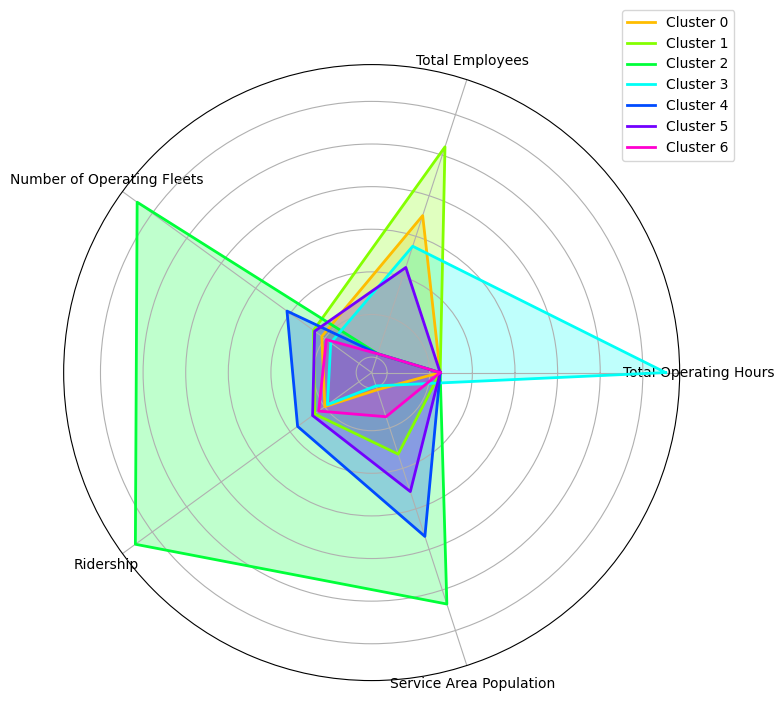

In [ ]:
from math import pi

# Function to standardize the data
# The data is standardized, meaning each variable has been scaled to have a mean of 0 and a standard deviation of 1. This ensures that all variables are on the same scale, making it easier to compare across different dimensions.
def standardize_data(df):
    return (df - df.mean()) / df.std()

# Function to create a combined radar chart for all clusters with standardized data
def create_combined_radar_chart(summary_stats_FA):
    # Standardize the data
    standardized_data = standardize_data(summary_stats_FA)
    
    # Number of variables we're plotting (only the factors used for clustering)
    labels = standardized_data.columns
    num_vars = len(labels)

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is a circle, so we need to "complete the loop" and append the start to the end.
    angles += angles[:1]

    # Initialize the radar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Define colors for the clusters
    colors = sns.color_palette("hsv", len(standardized_data))

    # Plot each cluster
    for cluster, color in zip(standardized_data.index, colors):
        data = standardized_data.loc[cluster].tolist()
        data.append(data[0])
        ax.fill(angles, data, color=color, alpha=0.25)
        ax.plot(angles, data, color=color, linewidth=2, label=f'Cluster {cluster}')

    # Add the feature labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Add a title and a legend
    #ax.set_title('Radar Plot of Cluster Profiles', size=20, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.show()

# Generate the combined radar chart
create_combined_radar_chart(summary_stats_FA)


### Replace FA transforemd data with PCA transforemed data


In [133]:
# PCA Analysis
n_components = 10
pca = PCA(n_components=n_components)
pca_factors = pca.fit_transform(df_scaled)

# PCA loadings
pca_loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components)], index=numerical_cols)

# Important variables identified by PCA (top variables in the first few principal components)
important_vars = [
    'Ridership', 
    'Number of Operating Fleets', 
    'Total Diesel (gal)', 
    'Total kWh', 
    'Electric Propulsion (kWh)', 
    'Diesel (gal)', 
    'Gasoline (gal)', 
    'Service Area Population', 
    'Service Area Sq Miles', 
    'Primary UZA Area Sq Miles'
]

# Gaussian Mixture Model Clustering with PCA transformed data
n_clusters = 7
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
clusters_gmm = gmm.fit_predict(pca_factors)

# Add cluster labels to the DataFrame
df['Cluster_GMM'] = clusters_gmm

# Summary statistics for each cluster
summary_stats = df.groupby('Cluster_GMM')[important_vars].mean()
print(summary_stats)

                Ridership  Number of Operating Fleets  Total Diesel (gal)  \
Cluster_GMM                                                                 
0            3.028470e+06                  273.850000        5.173779e+05   
1            2.200692e+07                 3720.500000        4.187469e+06   
2            4.911068e+08                50095.000000        3.635420e+07   
3            8.918978e+06                  838.659574        7.324955e+05   
4            6.231560e+05                   76.000000        0.000000e+00   
5            9.903334e+07                10832.444444        1.834204e+07   
6            3.016640e+07                 3930.125000        6.447162e+06   

                Total kWh  Electric Propulsion (kWh)  Diesel (gal)  \
Cluster_GMM                                                          
0            4.791756e+05               4.410349e+05  2.523354e+05   
1            8.428367e+06               7.699547e+06  1.889409e+06   
2            1.553066e+09 

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


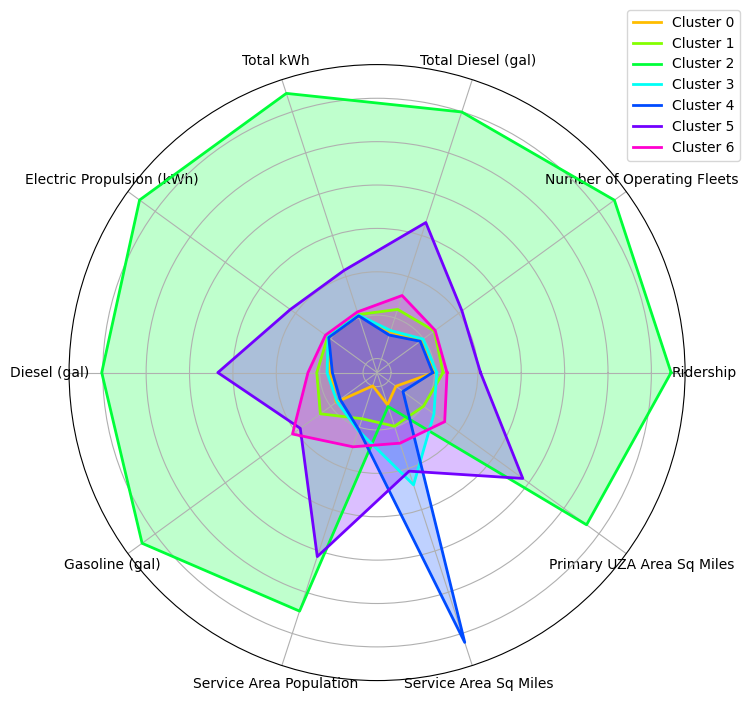

In [150]:
# The data is standardized, meaning each variable has been scaled to have a mean of 0 and a standard deviation of 1. This ensures that all variables are on the same scale, making it easier to compare across different dimensions.

# Function to standardize the data
def standardize_data(df):
    return (df - df.mean()) / df.std()

# Function to create a combined radar chart for all clusters with standardized data
def create_combined_radar_chart(summary_stats, colors):
    # Standardize the data
    standardized_data = standardize_data(summary_stats)
    
    # Number of variables we're plotting (only the important variables)
    labels = standardized_data.columns
    num_vars = len(labels)

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is a circle, so we need to "complete the loop" and append the start to the end.
    angles += angles[:1]

    # Initialize the radar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Plot each cluster
    for cluster, color in zip(standardized_data.index, colors):
        data = standardized_data.loc[cluster].tolist()
        data.append(data[0])
        ax.fill(angles, data, color=color, alpha=0.25)
        ax.plot(angles, data, color=color, linewidth=2, label=f'Cluster {cluster}')

    # Add the feature labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Add a title and a legend
    #ax.set_title('Radar Plot of Cluster Profiles', size=20, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.show()

# Define a consistent color palette
colors = sns.color_palette("hsv", n_clusters)

# Generate the combined radar chart
create_combined_radar_chart(summary_stats, colors)


##### Cluster 1 (Green): This cluster has high values across almost all variables, particularly Electric Propulsion (kWh), Total Diesel (gal), and Total kWh. This indicates that the systems in this cluster have extensive energy usage and diesel consumption, covering a samll service area which is populated .
##### Cluster 4 (Blue): This cluster has high values in Service area but lower values in energy consumption.
##### Cluster 6 (Magenta): This cluster has relatively moderate values across most variables but higher in Diesel (gal). Systems in this cluster might balance different energy sources with a leaning towards diesel.

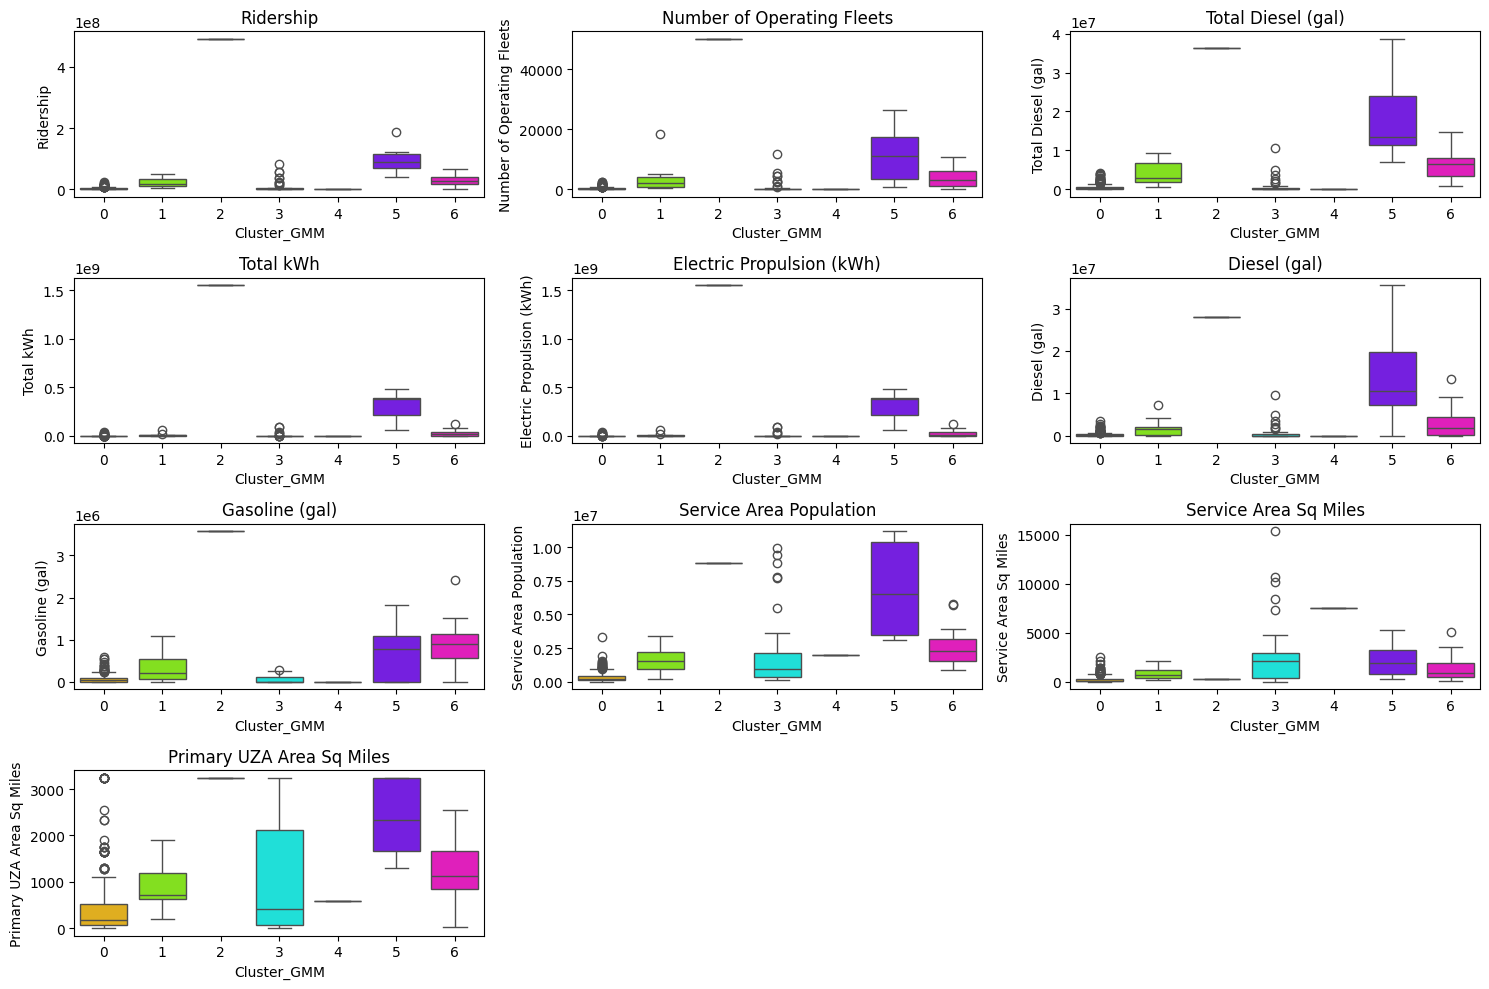

In [151]:
# Box plots for each feature within clusters
plt.figure(figsize=(15, 10))
for i, col in enumerate(important_vars, 1):
    plt.subplot((len(important_vars) // 3) + 1, 3, i)
    sns.boxplot(x='Cluster_GMM', y=col, data=df, hue='Cluster_GMM', palette=colors, legend=False)
    plt.title(col)
plt.tight_layout()
plt.show()

##### Cluster 5: Generally has the highest values across most features, indicating systems with large ridership, high energy consumption (both diesel and kWh), and large service areas.
##### Cluster 0 and Cluster 2: Generally have the lowest values across most features, indicating smaller systems with lower energy consumption and ridership.

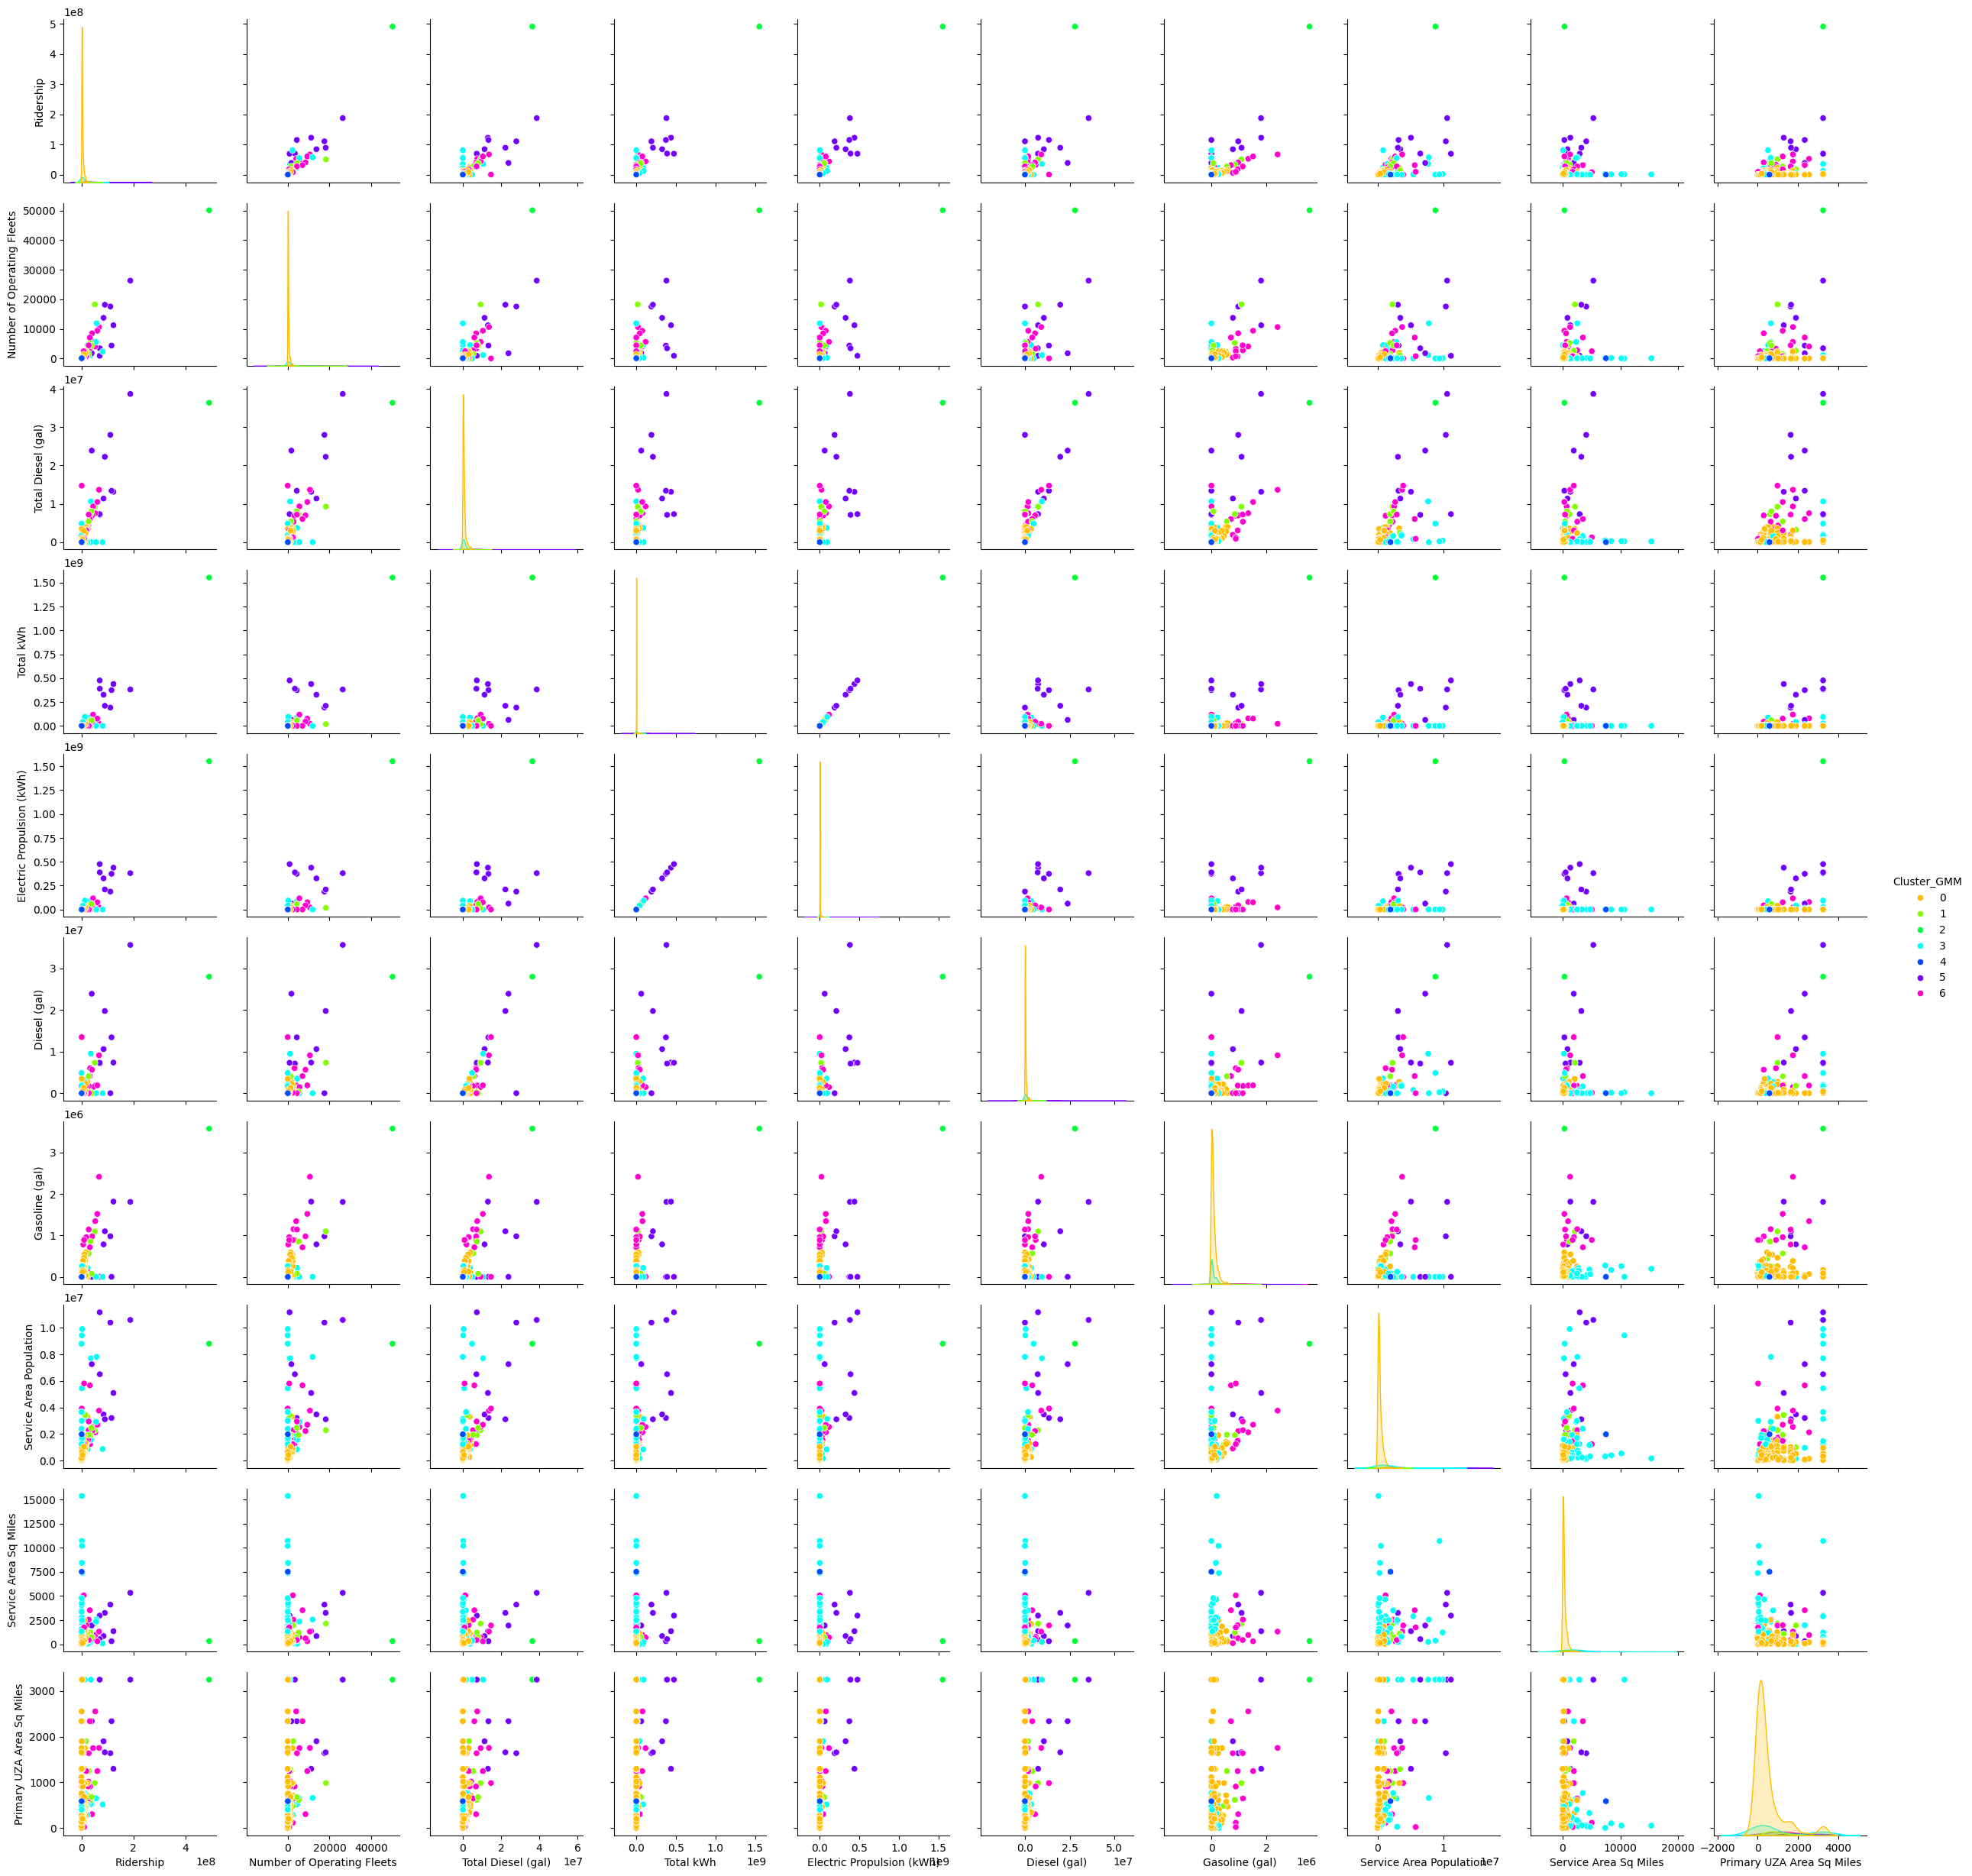

In [152]:
# Pair plot to observe relationships between features within clusters
sns.pairplot(df, hue='Cluster_GMM', vars=important_vars, palette=colors)
plt.show()

##### Key observations:
##### High Ridership and Fleet Size correlation: Clusters 4 and 6 show a strong positive correlation between ridership and the number of operating fleets. This indicates that systems with higher ridership tend to have a larger number of operating fleets.
##### High Fuel and Energy Consumption: Clusters 5 and 6 are characterized by high values across multiple fuel types (Total Diesel (gal), Total kWh, Electric Propulsion (kWh), and Gasoline (gal)). This suggests that these clusters represent larger transit systems with significant energy consumption.
##### Service Area Correlation: There is a noticeable positive correlation between service area population and service area square miles in Clusters 5 and 6, indicating that larger service areas tend to have larger populations. This highlights the scale of operations in these clusters.

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_22340\2677407903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster_GMM', data=df, palette=colors)


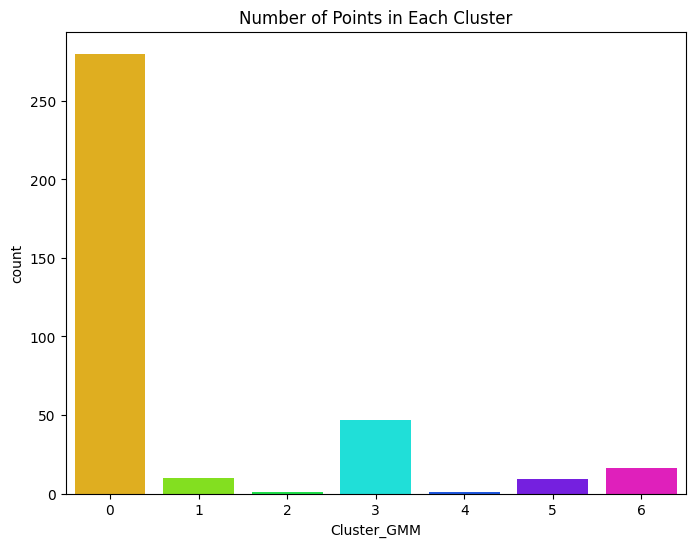

In [154]:
# Plot to show the number of points in each cluster
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster_GMM', data=df, palette=colors)
plt.title('Number of Points in Each Cluster')
plt.show()

##### The dominance of Cluster 0 suggests that many transit systems share similar characteristics.
##### The presence of smaller clusters indicates variability and specialization among other transit systems.

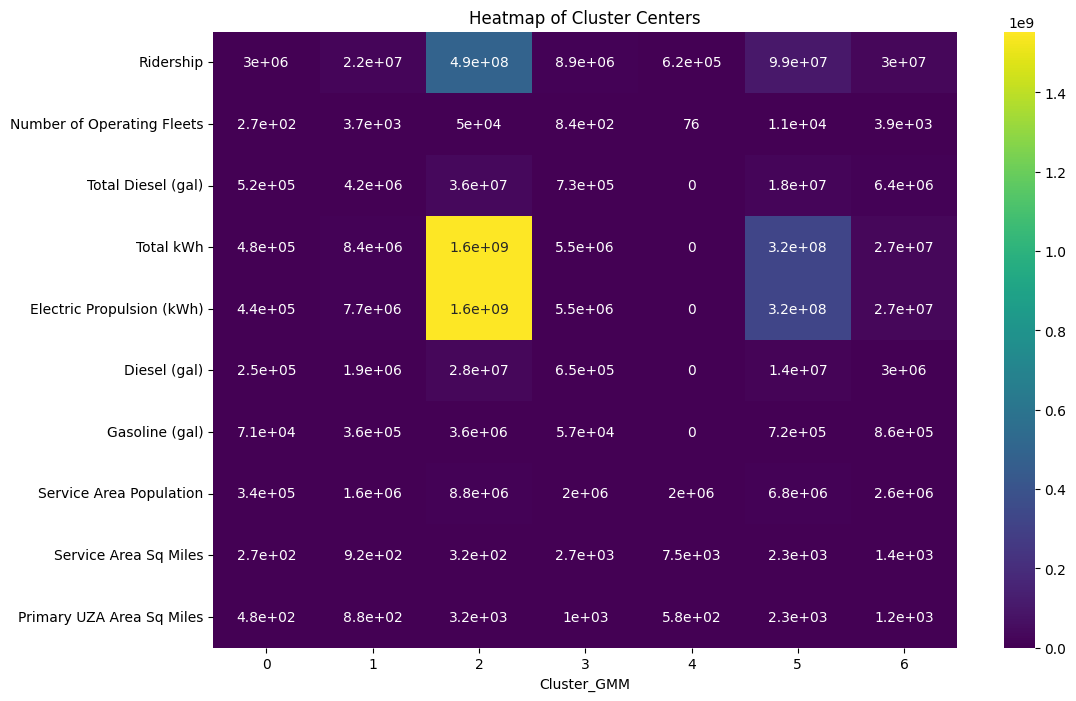

In [145]:
# Heatmap of cluster centers
plt.figure(figsize=(12, 8))
sns.heatmap(summary_stats.T, annot=True, cmap='viridis')
plt.title('Heatmap of Cluster Centers')
plt.show()

##### Key takeaways:
##### Cluster 2: Represents systems with extremely high ridership, large fleets, and significant fuel and energy consumption, indicating large, high-demand transit systems.
##### Cluster 5: Characterized by very high ridership, substantial diesel and kWh consumption, and large service areas, indicating another group of large, high-demand systems but with possibly different operational characteristics than Cluster 2.
##### Cluster 0: Represents the majority of the data points, indicating small to moderate systems with low ridership, fleet size, and fuel consumption.
##### Cluster 4: Contains systems with zero diesel and electric propulsion usage, possibly indicating a specialized group of systems with unique characteristics or data anomalies.
##### Clusters 1, 3, and 6: These clusters have moderate values across various features, indicating medium-sized systems with different operational scales and characteristics compared to the more extreme clusters (0, 2, and 5).